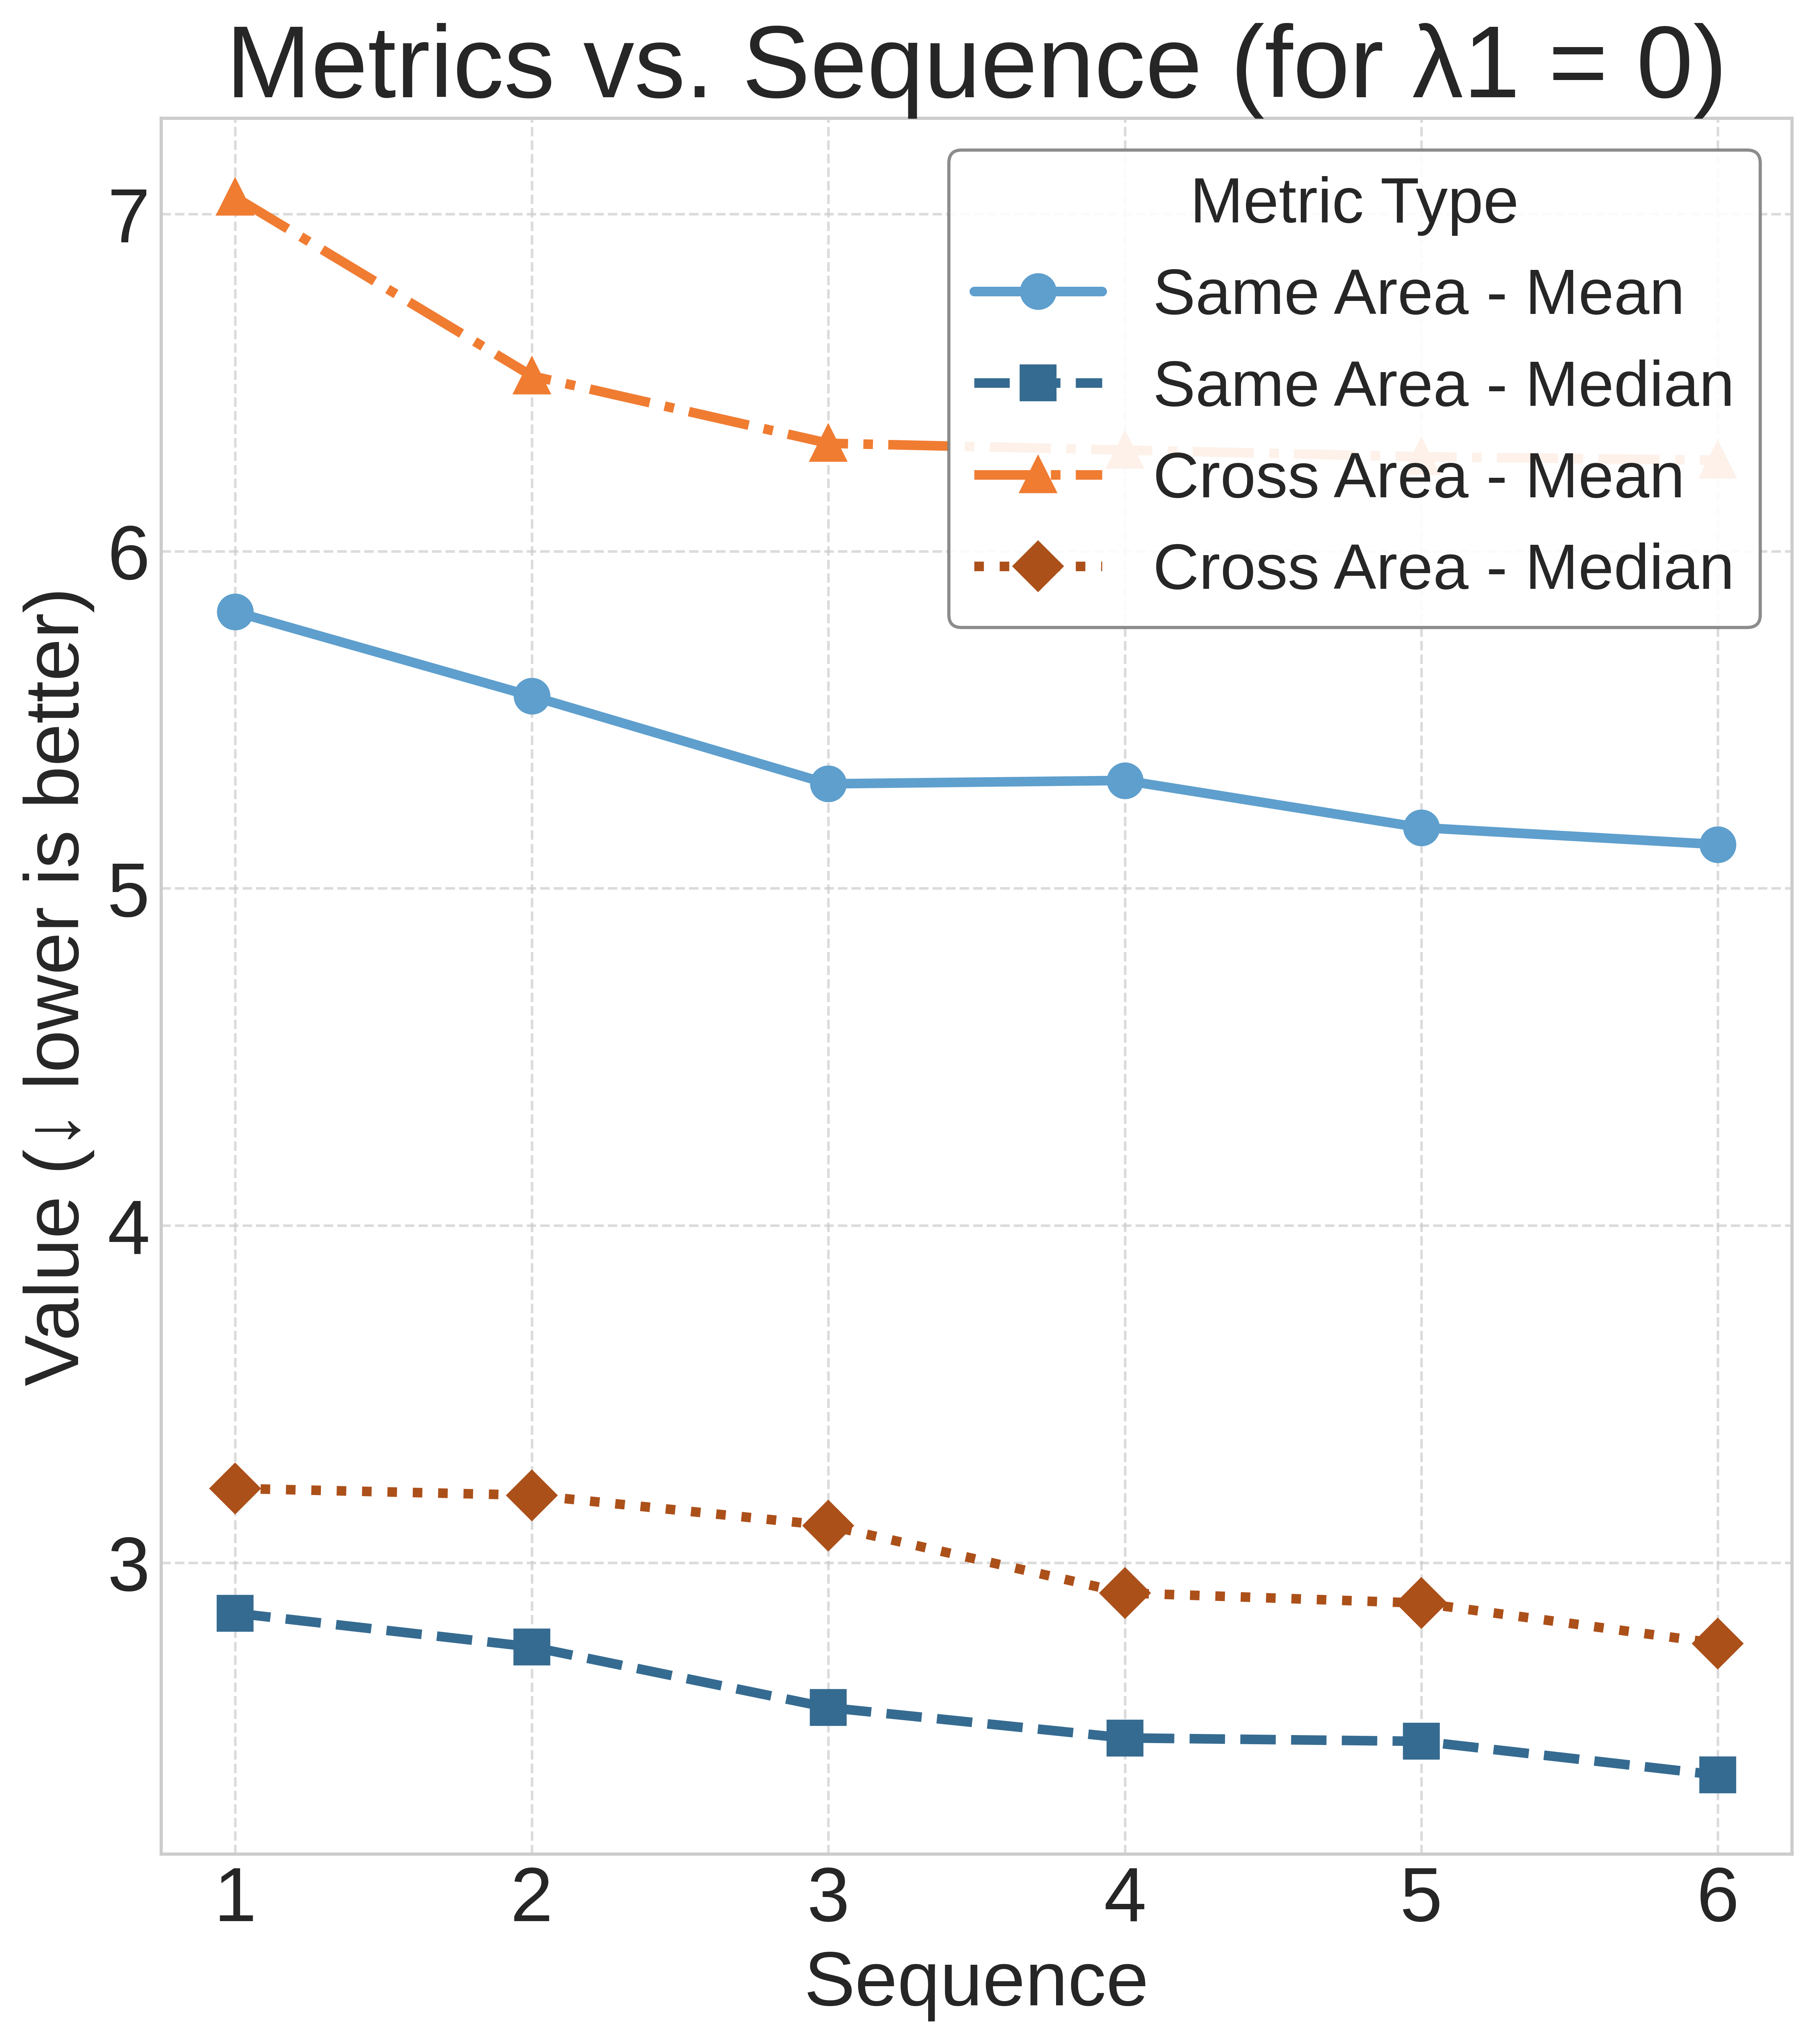

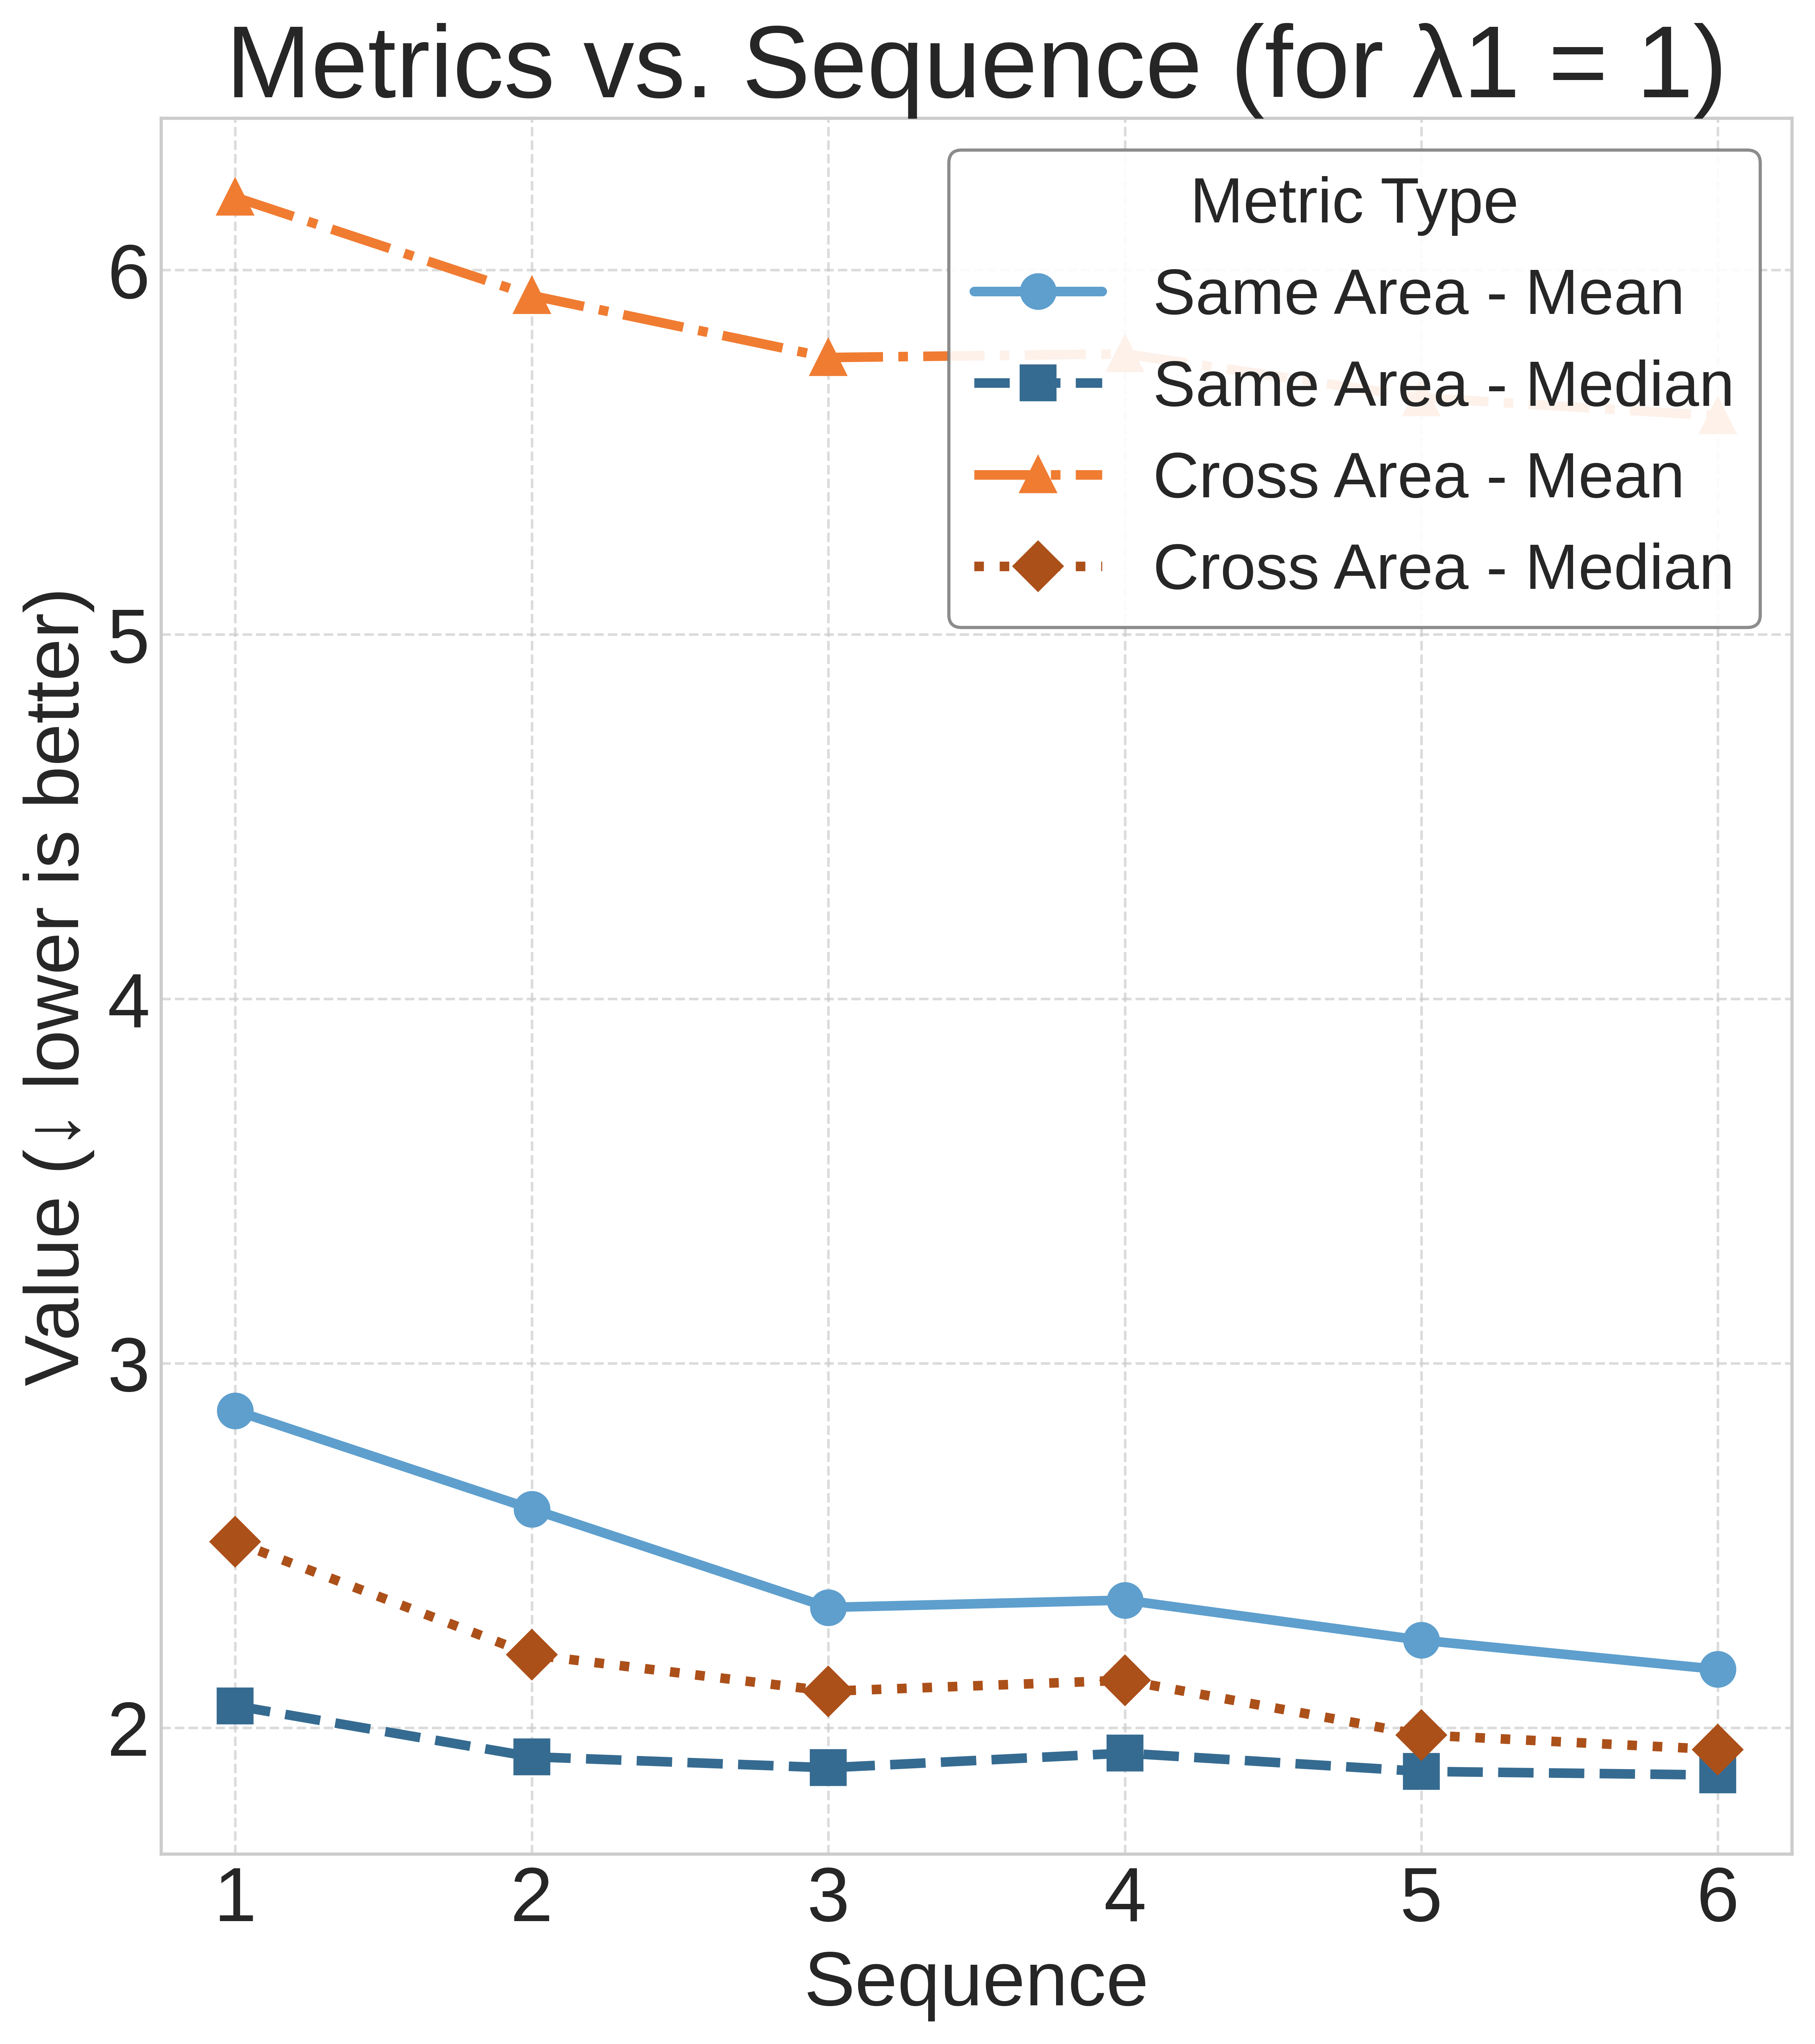

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn for enhanced scatter plots

# Set a style for the plot
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Prepare original data from the new Excel sheet
data_new = {
    'Sequence': [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6],
    'lambda1':  [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
    'Same Area Mean':   [5.82, 5.57, 5.31, 5.32, 5.18, 5.13, 2.87, 2.6,  2.33, 2.35, 2.24, 2.16],
    'Same Area Median': [2.85, 2.75, 2.57, 2.48, 2.47, 2.37, 2.06, 1.92, 1.89, 1.93, 1.88, 1.87],
    'Cross Area Mean':  [7.05, 6.52, 6.32, 6.3,  6.28, 6.27, 6.2,  5.93, 5.76, 5.77, 5.65, 5.6],
    'Cross Area Median':[3.22, 3.2,  3.11, 2.91, 2.88, 2.76, 2.51, 2.2,  2.1,  2.13, 1.98, 1.94]
}
df_new_original = pd.DataFrame(data_new)

# Define the series to plot - this is common for both charts
# 保持英文标签，因为之前的要求是将注释改为英文
series_to_plot = {
    'Same Area Mean': 'Same Area - Mean',
    'Same Area Median': 'Same Area - Median',
    'Cross Area Mean': 'Cross Area - Mean',
    'Cross Area Median': 'Cross Area - Median'
}

# Define markers and line styles for better differentiation - common for both charts
markers = ['o', 's', '^', 'D'] # 圆形, 方形, 三角形, 菱形
linestyles = ['-', '--', '-.', ':'] # 实线, 虚线, 点划线, 点线

# Define distinct color palettes for "Same Area" and "Cross Area"
# 使用深色调以获得更好的可见性 (_d 后缀在 seaborn 调色板中)
same_area_palette = sns.color_palette("Blues_d", 2)  # 两种不同的蓝色调
cross_area_palette = sns.color_palette("Oranges_d", 2) # 两种不同的橙色调

# Assign specific colors to each series based on the new scheme
# 顺序必须与 'series_to_plot' 中的项目顺序匹配
# 0: Same Area Mean, 1: Same Area Median, 2: Cross Area Mean, 3: Cross Area Median
plot_specific_colors = [
    same_area_palette[0],    # 'Same Area Mean' 的颜色
    same_area_palette[1],    # 'Same Area Median' 的颜色
    cross_area_palette[0],   # 'Cross Area Mean' 的颜色
    cross_area_palette[1]    # 'Cross Area Median' 的颜色
]


# Function to create the plot, to avoid code duplication
def create_sequence_line_chart(df_filtered, lambda_value_param):
    """
    Creates and displays a line chart for Sequence vs Value for a given lambda1 value.

    Args:
        df_filtered (pd.DataFrame): DataFrame filtered for a specific lambda1 value.
        lambda_value_param (int): The value of lambda1 for which the chart is being plotted.
    """
    # 调整 figsize 使横轴看起来更窄 (宽度减小)
    # 同时设置 DPI 以获得更高的分辨率
    fig, ax = plt.subplots(figsize=(8, 9), dpi=600) 

    for i, (column_name, label_name) in enumerate(series_to_plot.items()):
        ax.plot(df_filtered['Sequence'], df_filtered[column_name],
                label=label_name,
                marker=markers[i % len(markers)],      # 循环使用标记
                linestyle=linestyles[i % len(linestyles)], # 循环使用线条样式
                color=plot_specific_colors[i],       # 使用特别分配的颜色
                linewidth=2 * 1.5, # 略粗的线条
                markersize=7 * 1.5) # 略大的标记
        # 添加数据点标签
        # for x_val, y_val in zip(df_filtered['Sequence'], df_filtered[column_name]):
        #     # 数据点标签字体大小已根据先前请求设为24 (原始8的三倍)
        #     ax.text(x_val, y_val + 0.05, f'{y_val:.2f}', ha='center', va='bottom', fontsize=24, alpha=0.8)

    # Customize the chart with increased font sizes
    ax.set_xlabel('Sequence', fontsize=12 * 2) # X轴标签字体增大
    ax.set_ylabel('Value (↓ lower is better)', fontsize=12 * 2) # Y轴标签字体增大
    ax.set_title(f'Metrics vs. Sequence (for λ1 = {lambda_value_param})', fontsize=16 * 2) # 标题字体增大
    ax.set_xticks(df_filtered['Sequence'].unique()) # 确保所有 Sequence 值都显示为刻度
    ax.tick_params(axis='both', which='major', labelsize=12 * 2) # 刻度标签字体增大

    # Add a legend with increased font sizes and a white background frame
    legend = ax.legend(title='Metric Type', 
                       fontsize=10 * 2, 
                       title_fontsize=10 * 2, 
                       loc='upper right',
                       frameon=True,       # 为图例绘制边框
                       facecolor='white',  # 将边框背景颜色设为白色
                       edgecolor='grey',   # 设置边框颜色
                       fancybox=True)      # 使用圆角边框
    legend.get_frame().set_alpha(0.9) # 可选: 设置图例背景的透明度

    ax.grid(True, linestyle='--', alpha=0.7) # 添加网格以便更好地可读性

    # Adjust layout and display the chart
    plt.tight_layout()
    plt.show()

# 2. Filter data for lambda1 = 0 and plot
df_lambda0_new = df_new_original[df_new_original['lambda1'] == 0].copy()
# Sort by Sequence to ensure lines are drawn correctly
df_lambda0_new.sort_values('Sequence', inplace=True)
create_sequence_line_chart(df_lambda0_new, 0)

# 3. Filter data for lambda1 = 1 and plot
df_lambda1_new = df_new_original[df_new_original['lambda1'] == 1].copy()
# Sort by Sequence to ensure lines are drawn correctly
df_lambda1_new.sort_values('Sequence', inplace=True)
create_sequence_line_chart(df_lambda1_new, 1)


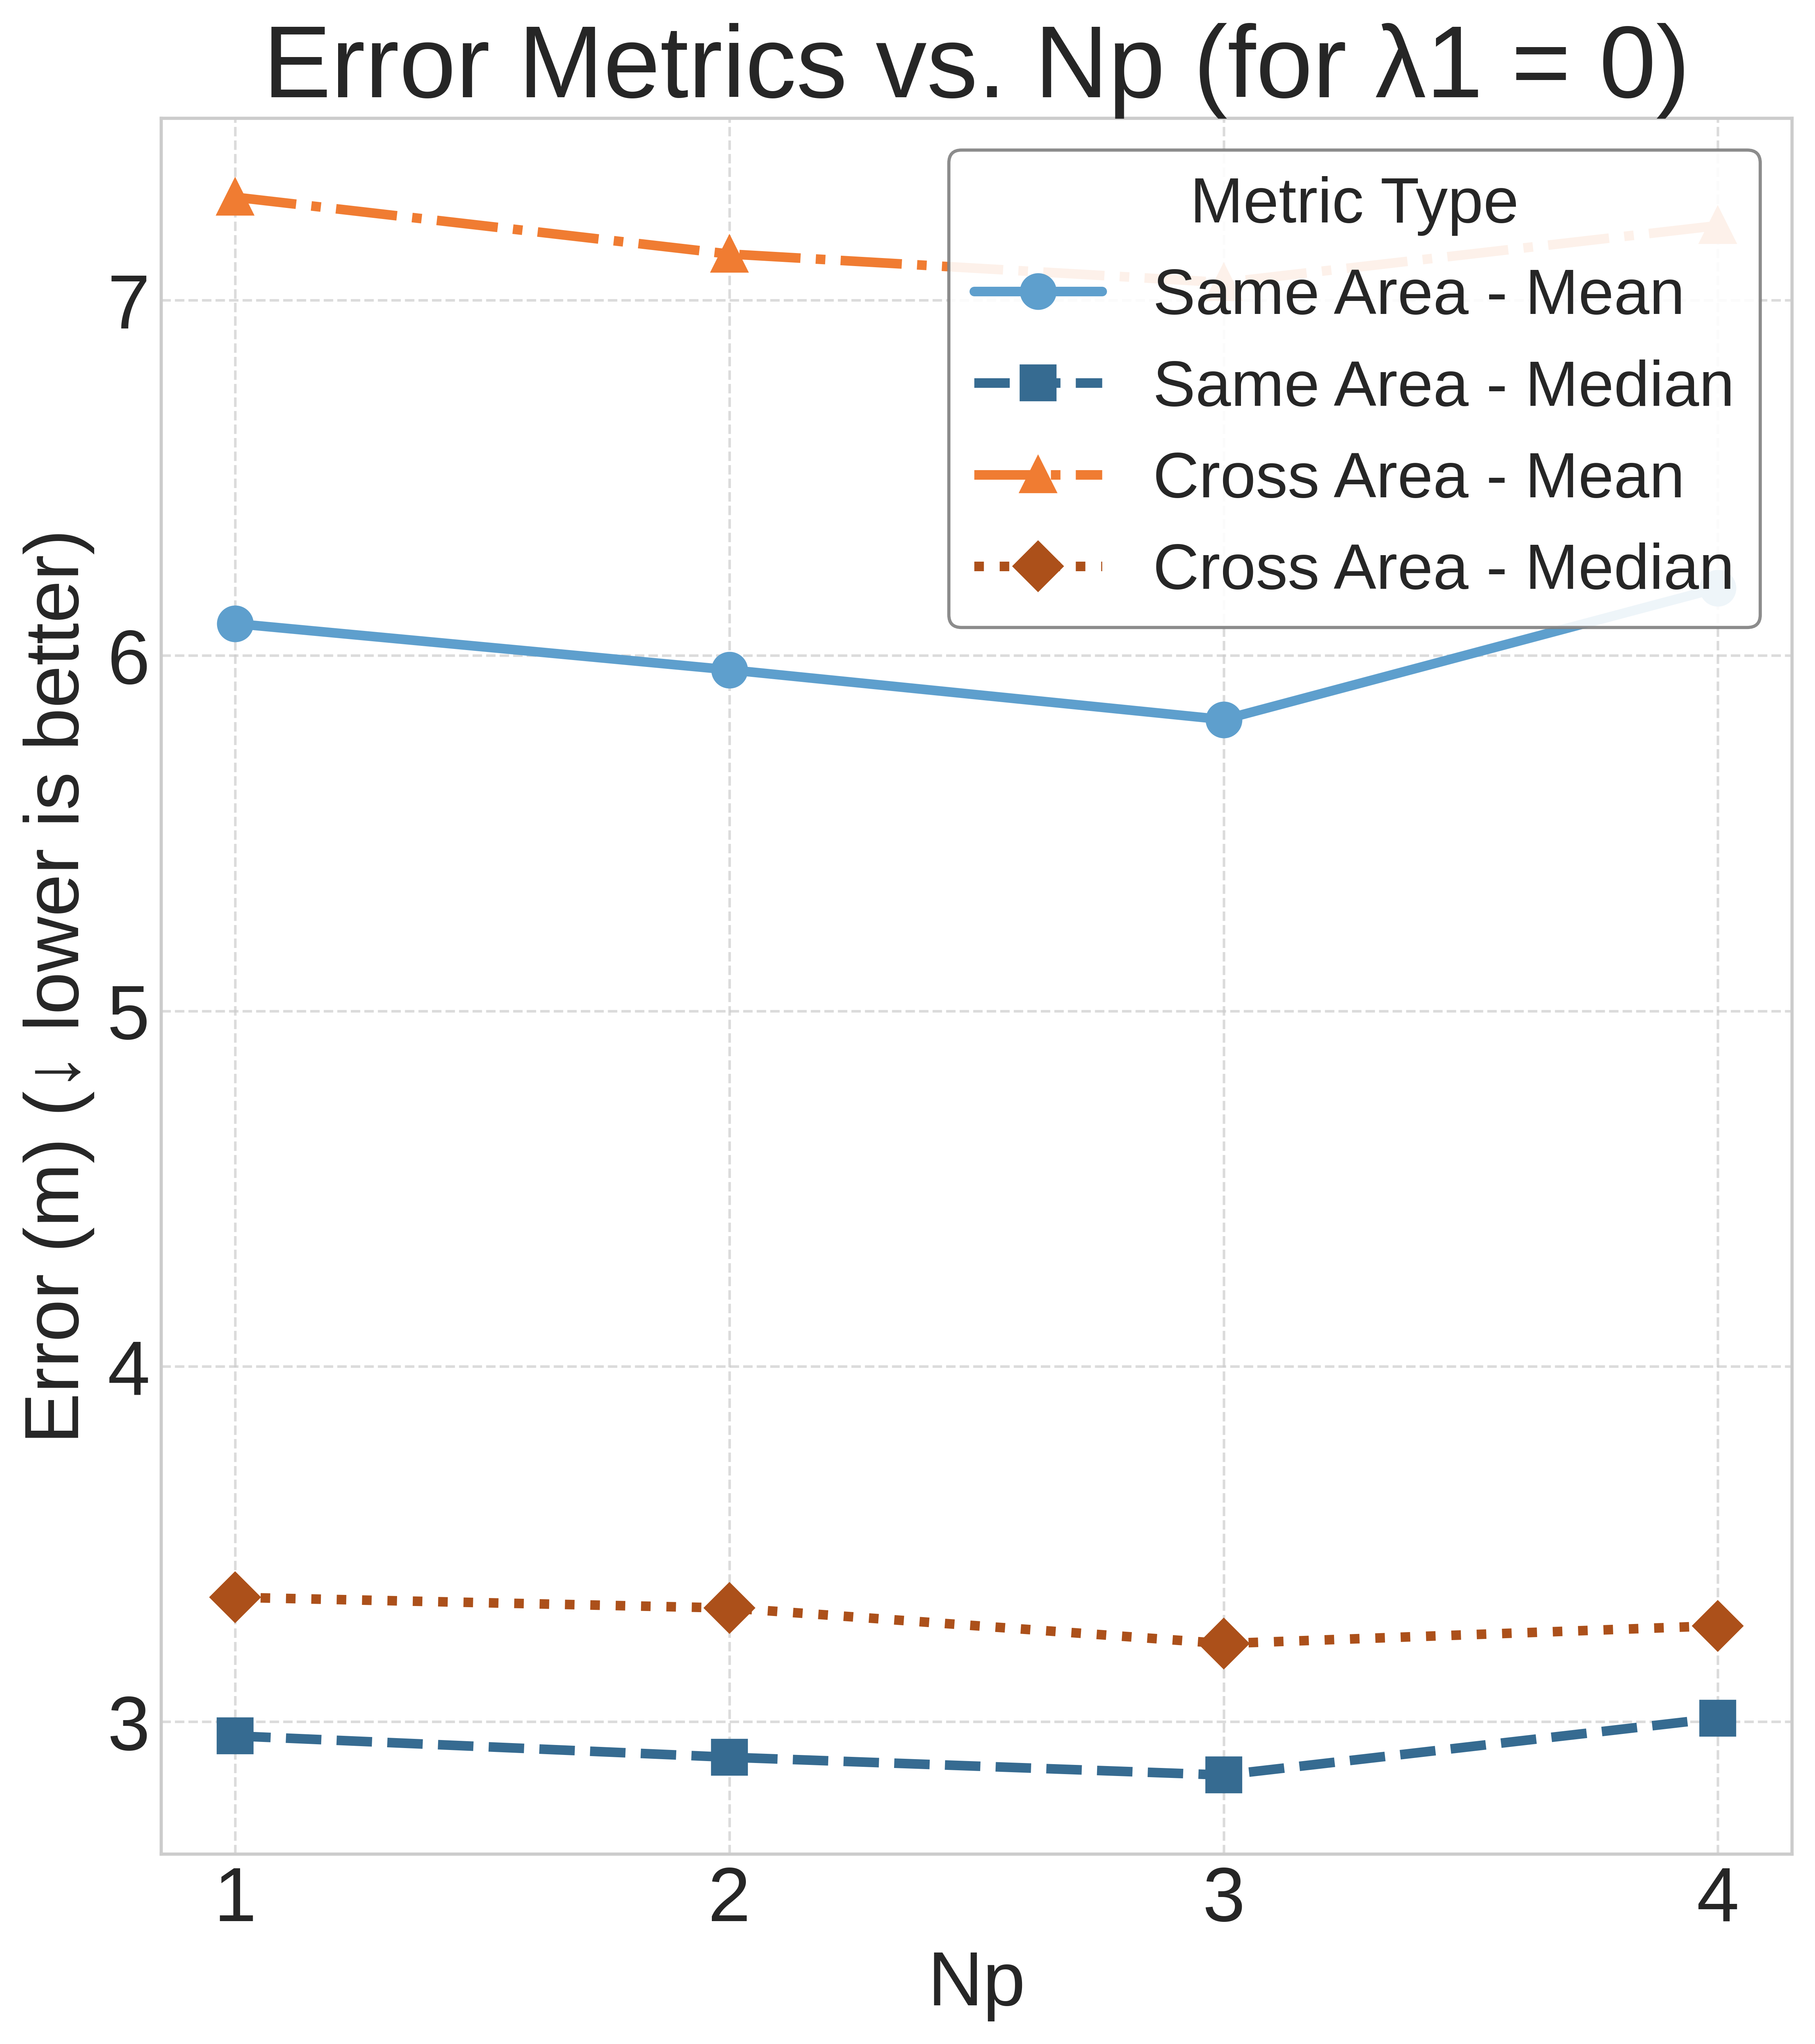

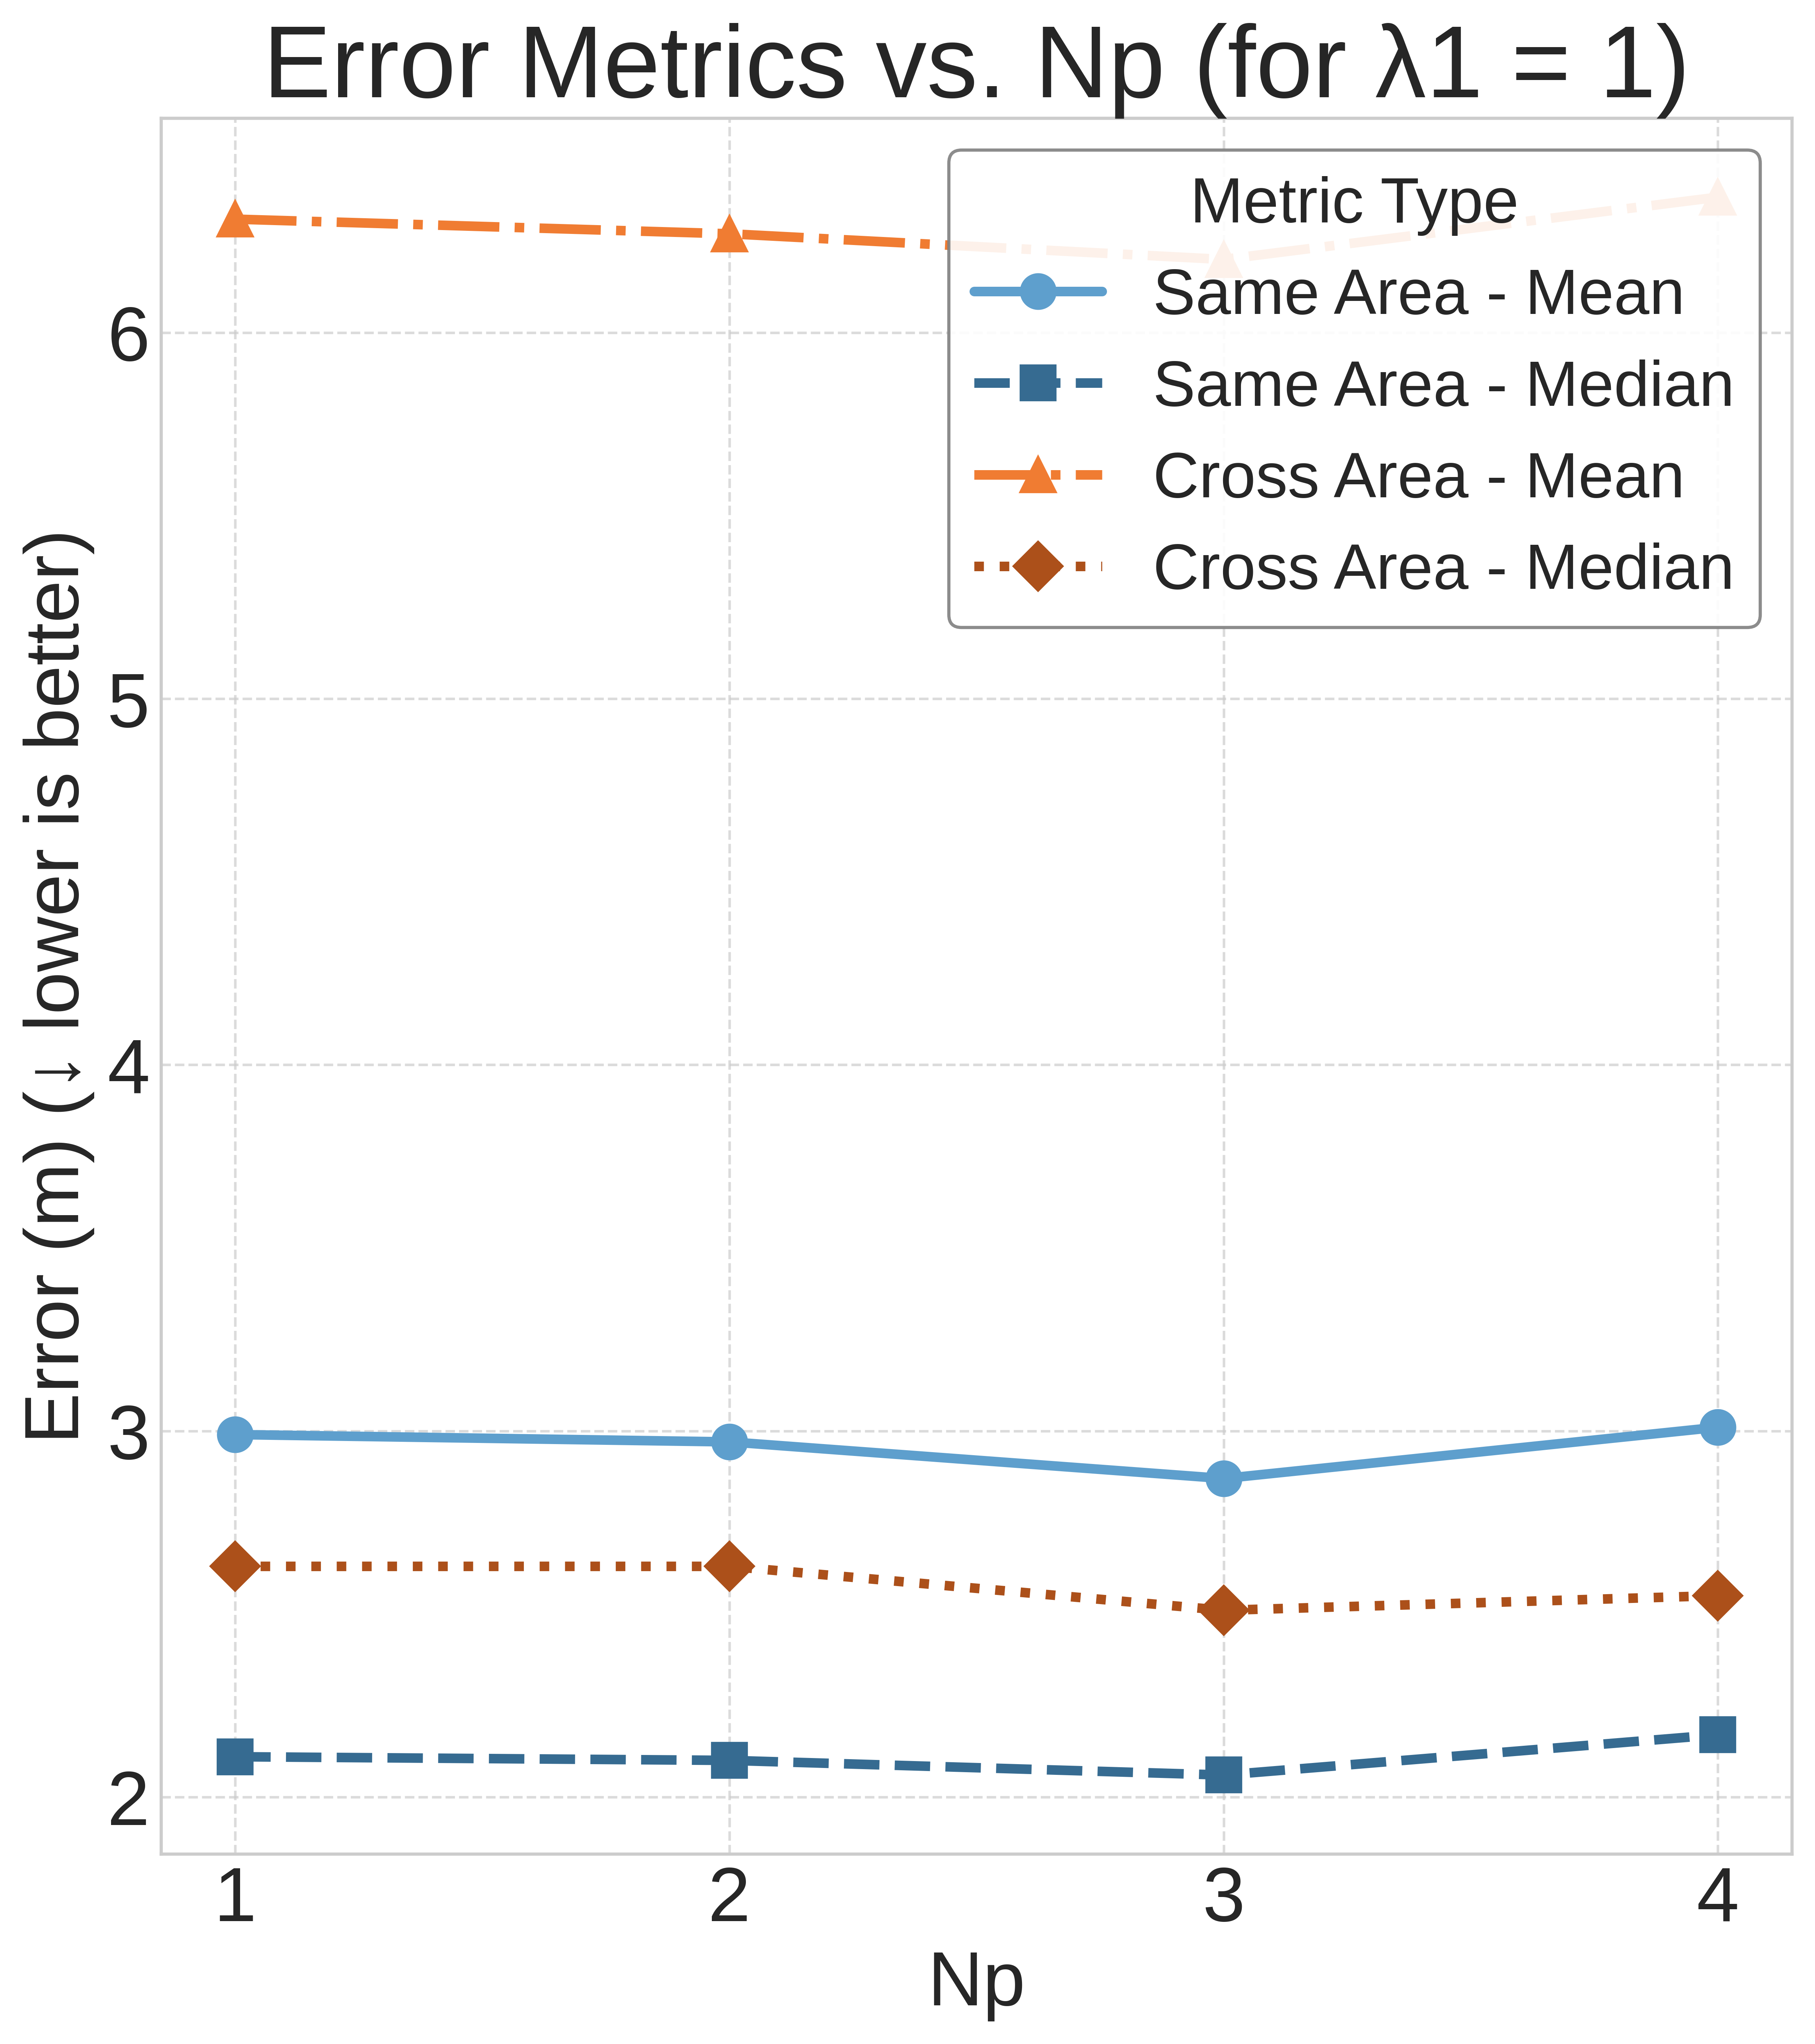

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn for enhanced scatter plots

# Set a style for the plot
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Prepare original data
data_full = {
    'Np':             [1,    2,    3,    4,    1,    2,    3,    4],
    'lambda1':        [0,    0,    0,    0,    1,    1,    1,    1],
    'Same Area Mean': [6.09, 5.96, 5.82, 6.19, 2.99, 2.97, 2.87, 3.01],
    'Same Area Median':[2.96, 2.9,  2.85, 3.01, 2.11,  2.10, 2.06, 2.17],
    'Cross Area Mean': [7.29, 7.13, 7.05, 7.21, 6.31, 6.27, 6.2,  6.37],
    'Cross Area Median':[3.35, 3.32, 3.22, 3.27, 2.63, 2.63, 2.51, 2.55]
}
df_original = pd.DataFrame(data_full)

# Define the series to plot - this is common for both charts
series_to_plot = {
    'Same Area Mean': 'Same Area - Mean',
    'Same Area Median': 'Same Area - Median',
    'Cross Area Mean': 'Cross Area - Mean',
    'Cross Area Median': 'Cross Area - Median'
}

# Define markers and line styles for better differentiation - common for both charts
markers = ['o', 's', '^', 'D']
linestyles = ['-', '--', '-.', ':']

# Define distinct color palettes for "Same Area" and "Cross Area"
# Using darker shades for better visibility (_d suffix in seaborn palettes)
same_area_palette = sns.color_palette("Blues_d", 2)  # Two distinct blue shades
cross_area_palette = sns.color_palette("Oranges_d", 2) # Two distinct orange shades

# Assign specific colors to each series based on the new scheme
# The order must match the order of items in 'series_to_plot'
# 0: Same Area Mean, 1: Same Area Median, 2: Cross Area Mean, 3: Cross Area Median
plot_specific_colors = [
    same_area_palette[0],    # Color for 'Same Area Mean'
    same_area_palette[1],    # Color for 'Same Area Median'
    cross_area_palette[0],   # Color for 'Cross Area Mean'
    cross_area_palette[1]    # Color for 'Cross Area Median'
]


# Function to create the plot, to avoid code duplication
def create_error_line_chart(df_filtered, lambda_value):
    """
    Creates and displays a line chart for Np vs Error for a given lambda value.

    Args:
        df_filtered (pd.DataFrame): DataFrame filtered for a specific lambda3 value.
        lambda_value (int): The value of lambda3 for which the chart is being plotted.
    """
    # Adjusted figsize to make the x-axis appear narrower (width reduced)
    fig, ax = plt.subplots(figsize=(8, 9), dpi=600) 

    for i, (column_name, label_name) in enumerate(series_to_plot.items()):
        ax.plot(df_filtered['Np'], df_filtered[column_name],
                label=label_name,
                marker=markers[i % len(markers)],      # Cycle through markers
                linestyle=linestyles[i % len(linestyles)], # Cycle through linestyles
                color=plot_specific_colors[i],       # Use the specifically assigned color
                linewidth=2 * 1.5, # Slightly thicker lines
                markersize=7 * 1.5) # Slightly larger markers
        # Add data point labels
        # for x_val, y_val in zip(df_filtered['Np'], df_filtered[column_name]):
        #     # Data point label fontsize is already 24 from previous request (3x of original 8)
        #     ax.text(x_val, y_val + 0.05, f'{y_val:.2f}', ha='center', va='bottom', fontsize=24, alpha=0.8)

    # Customize the chart with increased font sizes
    ax.set_xlabel('Np', fontsize=12 * 2) # Axis label fontsize increased
    ax.set_ylabel('Error (m) (↓ lower is better)', fontsize=12 * 2) # Axis label fontsize increased
    ax.set_title(f'Error Metrics vs. Np (for λ1 = {lambda_value})', fontsize=16 * 2) # Title fontsize increased
    ax.set_xticks(df_filtered['Np'].unique()) # Ensure all Np values are shown as ticks
    ax.tick_params(axis='both', which='major', labelsize=12 * 2) # Tick label fontsize increased

    # Add a legend with increased font sizes and a white background frame
    legend = ax.legend(title='Metric Type', 
                       fontsize=10 * 2, 
                       title_fontsize=10 * 2, 
                       loc='upper right',
                       frameon=True,       # Draw a frame around the legend
                       facecolor='white',  # Set background color of the frame to white
                       edgecolor='grey',   # Set border color of the frame
                       fancybox=True)      # Use rounded corners for the frame
    legend.get_frame().set_alpha(0.9) # Optional: set transparency for the legend background

    ax.grid(True, linestyle='--', alpha=0.7) # Add a grid for better readability

    # Adjust layout and display the chart
    plt.tight_layout()
    plt.show()

# 2. Filter data for lambda3 = 0 and plot
df_lambda0 = df_original[df_original['lambda1'] == 0].copy()
# Sort by Np to ensure lines are drawn correctly
df_lambda0.sort_values('Np', inplace=True)
create_error_line_chart(df_lambda0, 0)

# 3. Filter data for lambda3 = 1 and plot
df_lambda1 = df_original[df_original['lambda1'] == 1].copy()
# Sort by Np to ensure lines are drawn correctly
df_lambda1.sort_values('Np', inplace=True)
create_error_line_chart(df_lambda1, 1)


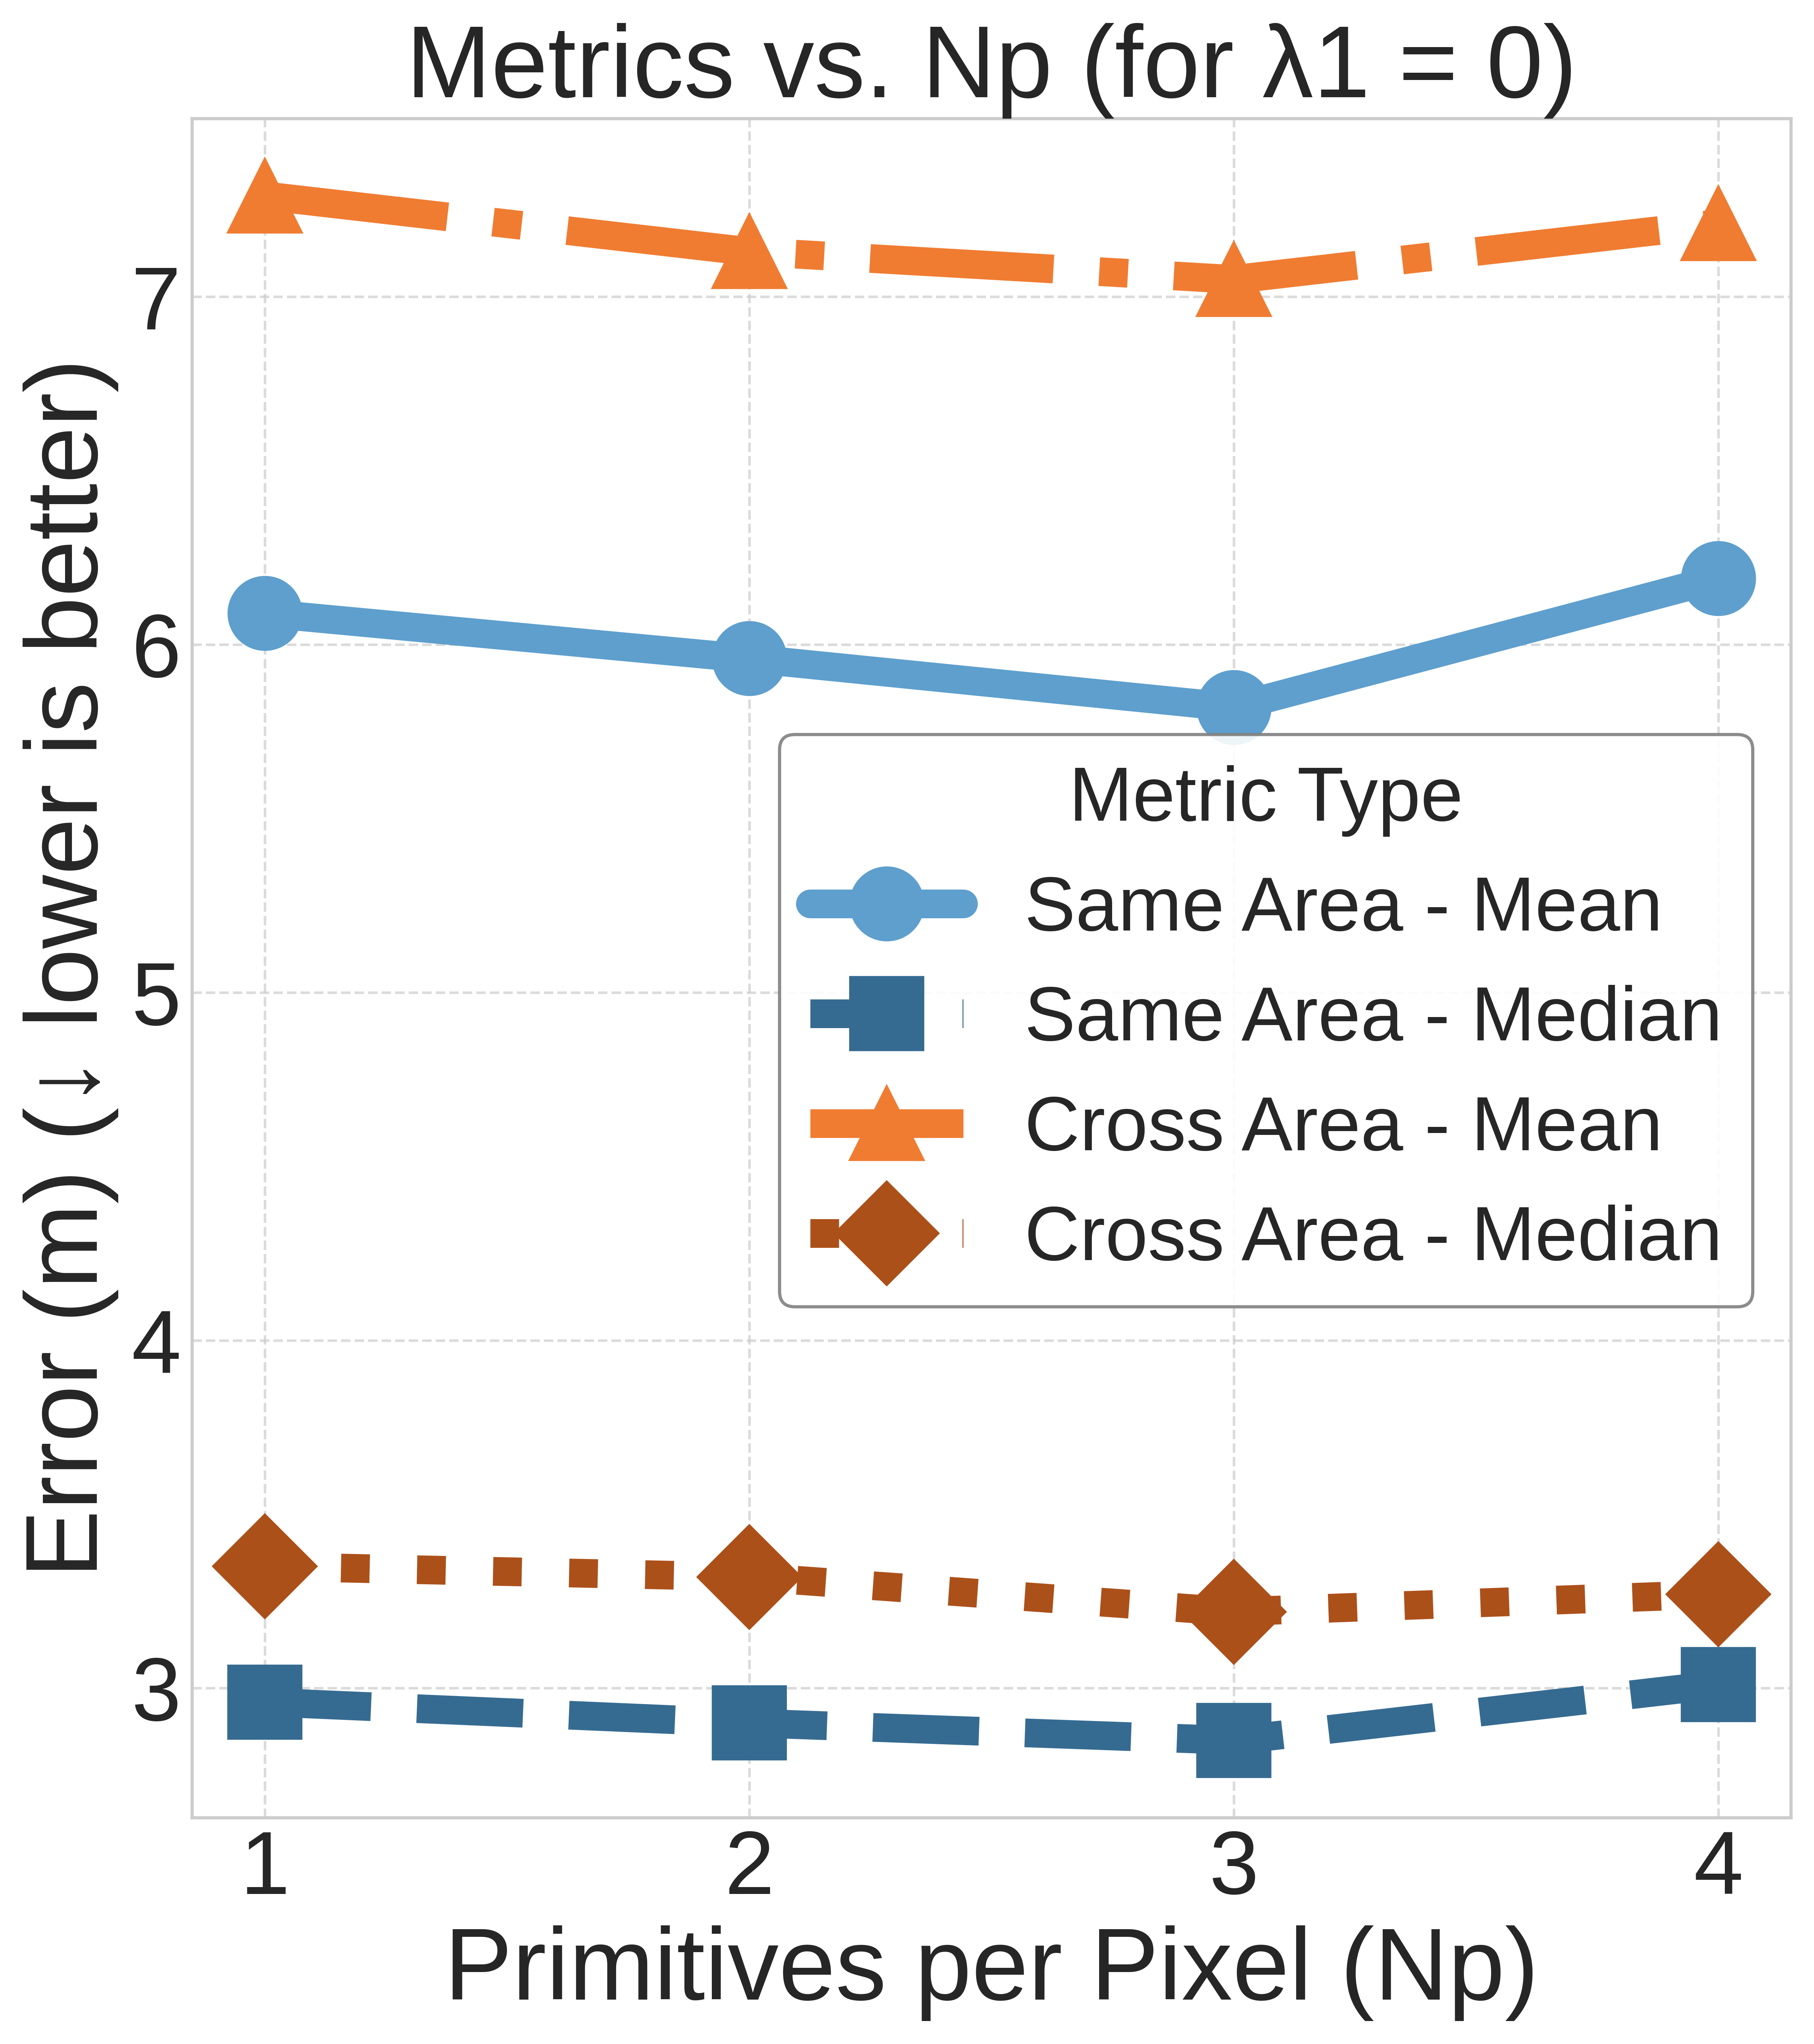

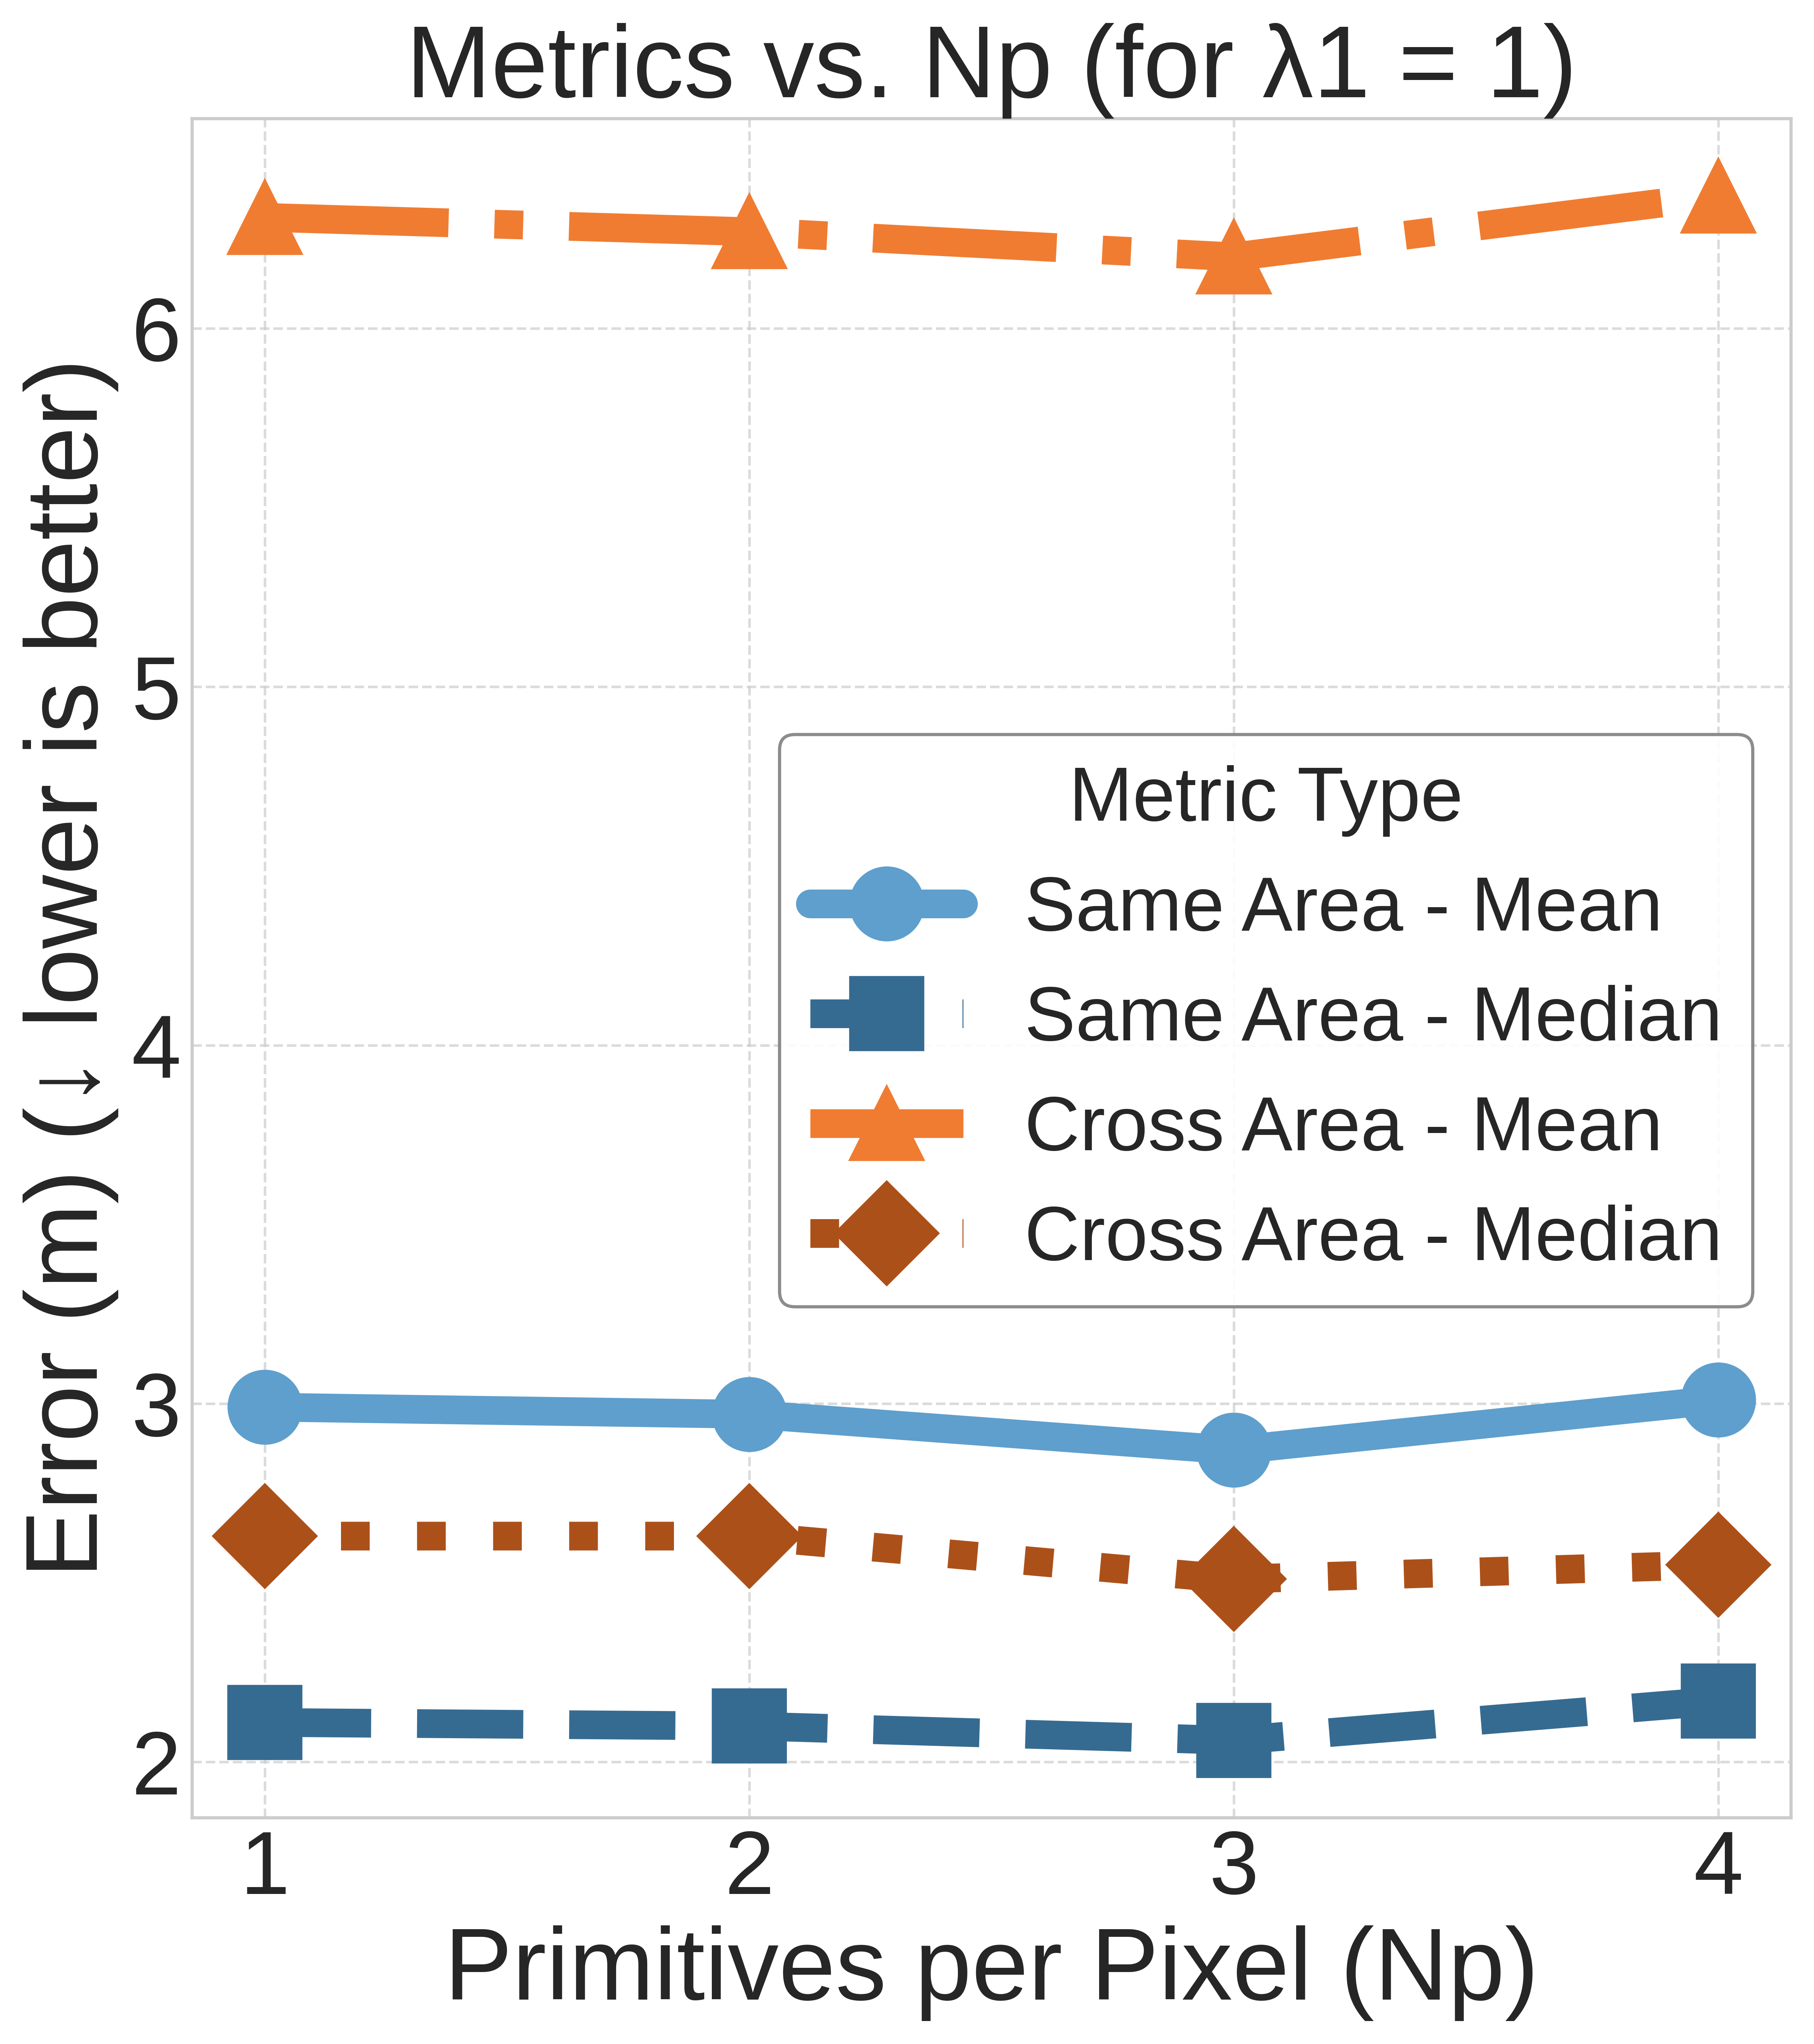

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn for enhanced scatter plots

# Set a style for the plot
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Prepare original data
data_full = {
    'Np':             [1,    2,    3,    4,    1,    2,    3,    4],
    'lambda1':        [0,    0,    0,    0,    1,    1,    1,    1],
    'Same Area Mean': [6.09, 5.96, 5.82, 6.19, 2.99, 2.97, 2.87, 3.01],
    'Same Area Median':[2.96, 2.9,  2.85, 3.01, 2.11,  2.10, 2.06, 2.17],
    'Cross Area Mean': [7.29, 7.13, 7.05, 7.21, 6.31, 6.27, 6.2,  6.37],
    'Cross Area Median':[3.35, 3.32, 3.22, 3.27, 2.63, 2.63, 2.51, 2.55]
}
df_original = pd.DataFrame(data_full)

# Define the series to plot - this is common for both charts
series_to_plot = {
    'Same Area Mean': 'Same Area - Mean',
    'Same Area Median': 'Same Area - Median',
    'Cross Area Mean': 'Cross Area - Mean',
    'Cross Area Median': 'Cross Area - Median'
}

# Define markers and line styles for better differentiation - common for both charts
markers = ['o', 's', '^', 'D']
linestyles = ['-', '--', '-.', ':']

# Define distinct color palettes for "Same Area" and "Cross Area"
# Using darker shades for better visibility (_d suffix in seaborn palettes)
same_area_palette = sns.color_palette("Blues_d", 2)  # Two distinct blue shades
cross_area_palette = sns.color_palette("Oranges_d", 2) # Two distinct orange shades

# Assign specific colors to each series based on the new scheme
# The order must match the order of items in 'series_to_plot'
# 0: Same Area Mean, 1: Same Area Median, 2: Cross Area Mean, 3: Cross Area Median
plot_specific_colors = [
    same_area_palette[0],    # Color for 'Same Area Mean'
    same_area_palette[1],    # Color for 'Same Area Median'
    cross_area_palette[0],   # Color for 'Cross Area Mean'
    cross_area_palette[1]    # Color for 'Cross Area Median'
]


# Function to create the plot, to avoid code duplication
def create_error_line_chart(df_filtered, lambda_value):
    """
    Creates and displays a line chart for Np vs Error for a given lambda value.

    Args:
        df_filtered (pd.DataFrame): DataFrame filtered for a specific lambda3 value.
        lambda_value (int): The value of lambda3 for which the chart is being plotted.
    """
    fig, ax = plt.subplots(figsize=(8, 9), dpi=600)

    for i, (column_name, label_name) in enumerate(series_to_plot.items()):
        ax.plot(df_filtered['Np'], df_filtered[column_name],
                label=label_name,
                marker=markers[i % len(markers)],
                linestyle=linestyles[i % len(linestyles)],
                color=plot_specific_colors[i], # <<<< COLORS REVERTED
                linewidth=9.0,                 # <<<< Line width kept as per last request
                markersize=22.5)               # <<<< Marker size kept as per last request
        # Add data point labels (uncomment if needed)
        # for x_val, y_val in zip(df_filtered['Np'], df_filtered[column_name]):
        #     offset = 0.15 # Adjust if needed due to large markers
        #     ax.text(x_val, y_val + offset, f'{y_val:.2f}', ha='center', va='bottom', fontsize=24, alpha=0.8, color=plot_specific_colors[i])


    # Customize the chart with increased font sizes
    ax.set_xlabel('Primitives per Pixel (Np)', fontsize=16 * 2)
    ax.set_ylabel('Error (m) (↓ lower is better)', fontsize=16* 2)
    ax.set_title(f'Metrics vs. Np (for λ1 = {lambda_value})', fontsize=16 * 2)
    ax.set_xticks(df_filtered['Np'].unique())
    ax.tick_params(axis='both', which='major', labelsize=14 * 2)

    # Add a legend with increased font sizes and a white background frame
    legend = ax.legend(title='Metric Type',
                       fontsize=12 * 2,
                       title_fontsize=12 * 2,
                       loc='upper right',
                       bbox_to_anchor=(1.0, 0.66),
                       frameon=True,
                       facecolor='white',
                       edgecolor='grey',
                       fancybox=True)
    legend.get_frame().set_alpha(0.9)

    ax.grid(True, linestyle='--', alpha=0.7)

    # Adjust layout and display the chart
    plt.tight_layout()
    plt.show()

# 2. Filter data for lambda3 = 0 and plot
df_lambda0 = df_original[df_original['lambda1'] == 0].copy()
df_lambda0.sort_values('Np', inplace=True)
create_error_line_chart(df_lambda0, 0)

# 3. Filter data for lambda3 = 1 and plot
df_lambda1 = df_original[df_original['lambda1'] == 1].copy()
df_lambda1.sort_values('Np', inplace=True)
create_error_line_chart(df_lambda1, 1)

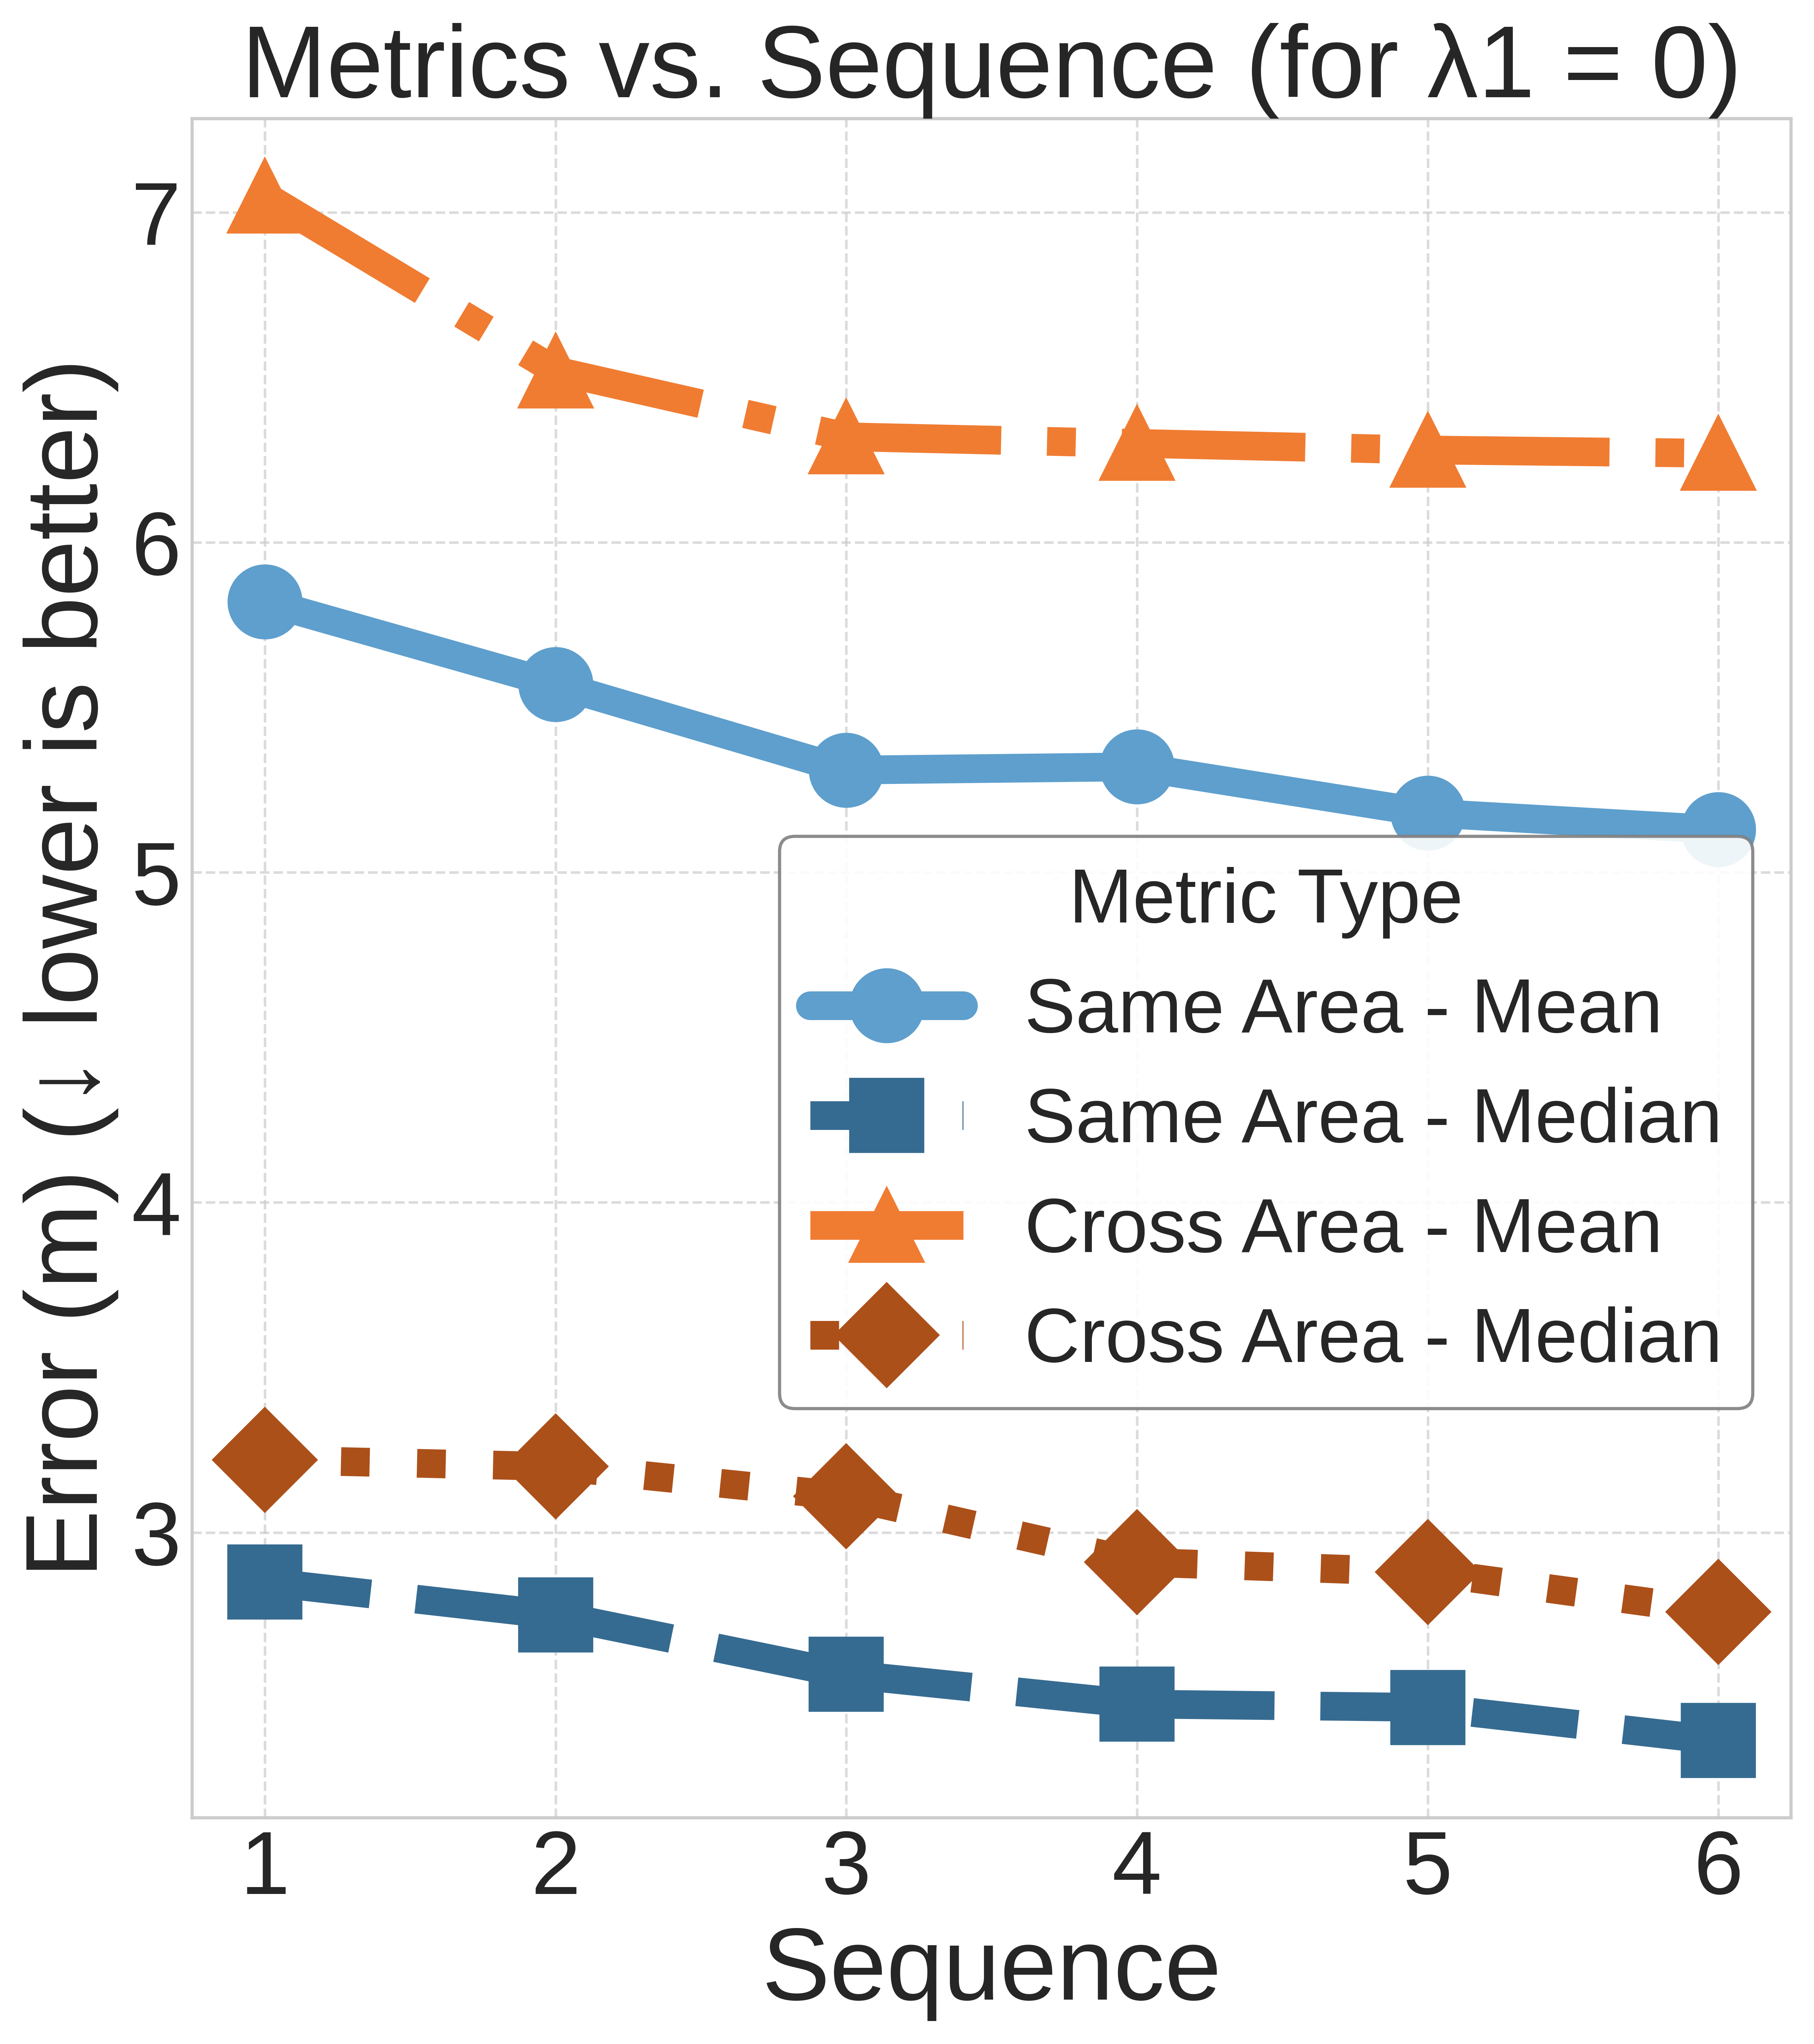

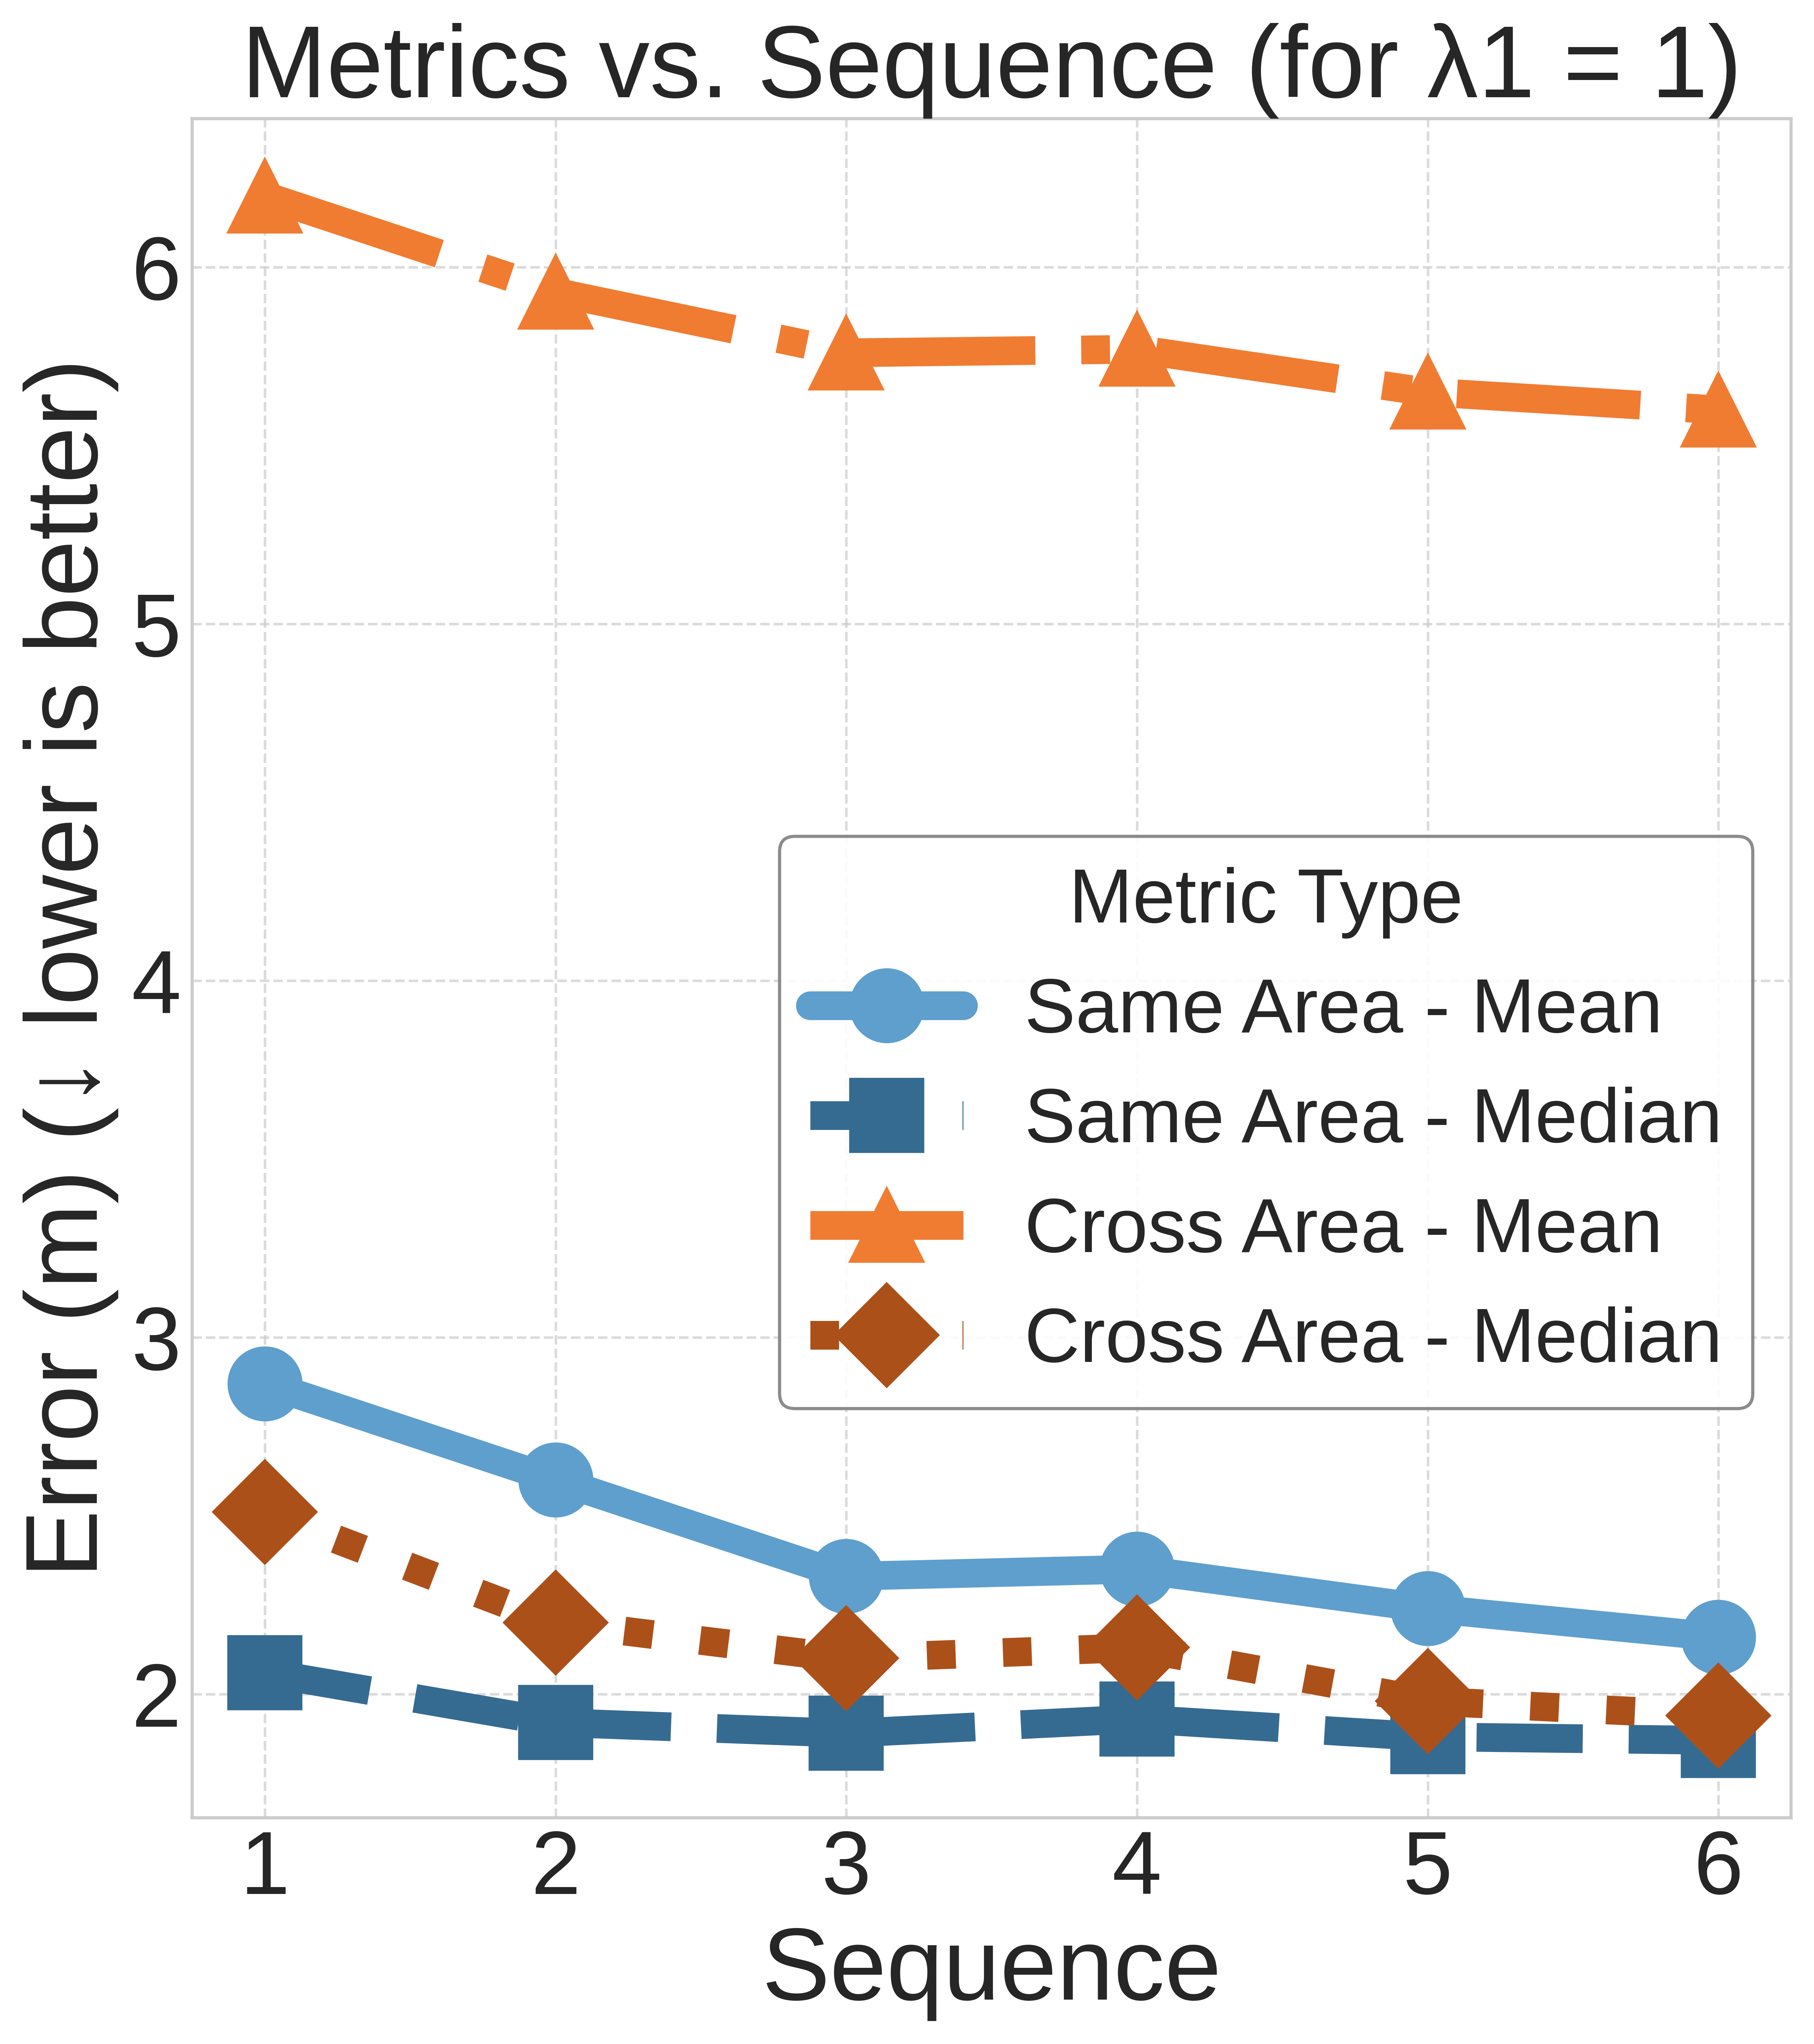

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn for enhanced scatter plots

# Set a style for the plot
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Prepare original data from the new Excel sheet
data_new = {
    'Sequence': [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6],
    'lambda1':  [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
    'Same Area Mean':   [5.82, 5.57, 5.31, 5.32, 5.18, 5.13, 2.87, 2.6,  2.33, 2.35, 2.24, 2.16],
    'Same Area Median': [2.85, 2.75, 2.57, 2.48, 2.47, 2.37, 2.06, 1.92, 1.89, 1.93, 1.88, 1.87],
    'Cross Area Mean':  [7.05, 6.52, 6.32, 6.3,  6.28, 6.27, 6.2,  5.93, 5.76, 5.77, 5.65, 5.6],
    'Cross Area Median':[3.22, 3.2,  3.11, 2.91, 2.88, 2.76, 2.51, 2.2,  2.1,  2.13, 1.98, 1.94]
}
df_new_original = pd.DataFrame(data_new)

# Define the series to plot - this is common for both charts
# 保持英文标签，因为之前的要求是将注释改为英文
series_to_plot = {
    'Same Area Mean': 'Same Area - Mean',
    'Same Area Median': 'Same Area - Median',
    'Cross Area Mean': 'Cross Area - Mean',
    'Cross Area Median': 'Cross Area - Median'
}

# Define markers and line styles for better differentiation - common for both charts
markers = ['o', 's', '^', 'D'] # 圆形, 方形, 三角形, 菱形
linestyles = ['-', '--', '-.', ':'] # 实线, 虚线, 点划线, 点线

# Define distinct color palettes for "Same Area" and "Cross Area"
# 使用深色调以获得更好的可见性 (_d 后缀在 seaborn 调色板中)
same_area_palette = sns.color_palette("Blues_d", 2)  # 两种不同的蓝色调
cross_area_palette = sns.color_palette("Oranges_d", 2) # 两种不同的橙色调

# Assign specific colors to each series based on the new scheme
# 顺序必须与 'series_to_plot' 中的项目顺序匹配
# 0: Same Area Mean, 1: Same Area Median, 2: Cross Area Mean, 3: Cross Area Median
plot_specific_colors = [
    same_area_palette[0],    # 'Same Area Mean' 的颜色
    same_area_palette[1],    # 'Same Area Median' 的颜色
    cross_area_palette[0],   # 'Cross Area Mean' 的颜色
    cross_area_palette[1]    # 'Cross Area Median' 的颜色
]


# Function to create the plot, to avoid code duplication
def create_sequence_line_chart(df_filtered, lambda_value_param):
    """
    Creates and displays a line chart for Sequence vs Value for a given lambda1 value.

    Args:
        df_filtered (pd.DataFrame): DataFrame filtered for a specific lambda1 value.
        lambda_value_param (int): The value of lambda1 for which the chart is being plotted.
    """
    # 调整 figsize 使横轴看起来更窄 (宽度减小)
    # 同时设置 DPI 以获得更高的分辨率
    fig, ax = plt.subplots(figsize=(8, 9), dpi=600)

    for i, (column_name, label_name) in enumerate(series_to_plot.items()):
        ax.plot(df_filtered['Sequence'], df_filtered[column_name],
                label=label_name,
                marker=markers[i % len(markers)],      # 循环使用标记
                linestyle=linestyles[i % len(linestyles)], # 循环使用线条样式
                color=plot_specific_colors[i],       # 使用特别分配的颜色
                linewidth=9.0, # <<<< 修改：线宽与之前一致
                markersize=22.5) # <<<< 修改：标记点大小与之前一致
        # 添加数据点标签
        # for x_val, y_val in zip(df_filtered['Sequence'], df_filtered[column_name]):
        #     # 数据点标签字体大小已根据先前请求设为24 (原始8的三倍)
        #     # 可能需要调整offset以适应更大的标记点
        #     offset = 0.15
        #     ax.text(x_val, y_val + offset, f'{y_val:.2f}', ha='center', va='bottom', fontsize=24, alpha=0.8, color=plot_specific_colors[i])


    # Customize the chart with increased font sizes
    ax.set_xlabel('Sequence', fontsize=16 * 2) # X轴标签字体增大
    ax.set_ylabel('Error (m) (↓ lower is better)', fontsize=16 * 2) # Y轴标签字体增大
    ax.set_title(f'Metrics vs. Sequence (for λ1 = {lambda_value_param})', fontsize=16 * 2) # 标题字体增大
    ax.set_xticks(df_filtered['Sequence'].unique()) # 确保所有 Sequence 值都显示为刻度
    ax.tick_params(axis='both', which='major', labelsize=14 * 2) # 刻度标签字体增大

    # Add a legend with increased font sizes and a white background frame
    legend = ax.legend(title='Metric Type',
                       fontsize=12 * 2,
                       title_fontsize=12 * 2,
                       loc='upper right',
                       bbox_to_anchor=(1.0, 0.6),
                       frameon=True,       # 为图例绘制边框
                       facecolor='white',  # 将边框背景颜色设为白色
                       edgecolor='grey',   # 设置边框颜色
                       fancybox=True)      # 使用圆角边框
    legend.get_frame().set_alpha(0.9) # 可选: 设置图例背景的透明度

    ax.grid(True, linestyle='--', alpha=0.7) # 添加网格以便更好地可读性

    # Adjust layout and display the chart
    plt.tight_layout()
    plt.show()

# 2. Filter data for lambda1 = 0 and plot
df_lambda0_new = df_new_original[df_new_original['lambda1'] == 0].copy()
# Sort by Sequence to ensure lines are drawn correctly
df_lambda0_new.sort_values('Sequence', inplace=True)
create_sequence_line_chart(df_lambda0_new, 0)

# 3. Filter data for lambda1 = 1 and plot
df_lambda1_new = df_new_original[df_new_original['lambda1'] == 1].copy()
# Sort by Sequence to ensure lines are drawn correctly
df_lambda1_new.sort_values('Sequence', inplace=True)
create_sequence_line_chart(df_lambda1_new, 1)